In [1]:
import covid_feature_extraction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import interpolate
from sklearn.model_selection import KFold

In [21]:
def spline_wrapper(county_X, county_y, field, field_name, smoothing, target_name
    selected_column = county_X[field]
    selected_column = np.array(selected_column).reshape(len(selected_column),1)
    y = county_y
    y = np.array(y).reshape(len(y),1)
    combined = np.concatenate([selected_column,y],axis=1)
    combined = combined[combined[:,0].argsort()]

    selected_column = combined[:,0]
    y = combined[:,1]

    spline = interpolate.UnivariateSpline(selected_column,y,s=smoothing)
    x_range = np.linspace(min(selected_column),max(selected_column),100)
    new_Y = spline(x_range)
    
    kf = KFold(n_splits=5)
    mse_vals = []
    for train_indices, test_indices in kf.split(selected_column):
        train_X, test_X = selected_column[train_indices], selected_column[test_indices]
        train_y, test_y = y[train_indices], y[test_indices]
        
        cv_spline = interpolate.UnivariateSpline(train_X,train_y,s=smoothing)
        pred_y = cv_spline(test_X)
        mse = ((test_y - pred_y)**2).mean()
        mse_vals.append(mse)
    print("Cross-validated MSE: {}".format(np.array(mse_vals).mean()))

    fig = plt.subplots(figsize=(15,6))

    plt.plot(x_range, new_Y,color='red')
    plt.scatter(selected_column,y,color='k',s=8)

    plt.xlabel(field_name,fontsize=22,labelpad=10)
    plt.ylabel(target_name,fontsize=22,labelpad=12)
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    if save:
        plt.title(save_county,fontsize=24,weight='bold')
        plt.savefig("{}_spline_{}_{}.png".format(save_county, field_name, target_name))
    
    plt.show()

# Population Not Staying Home

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.0013512299412312


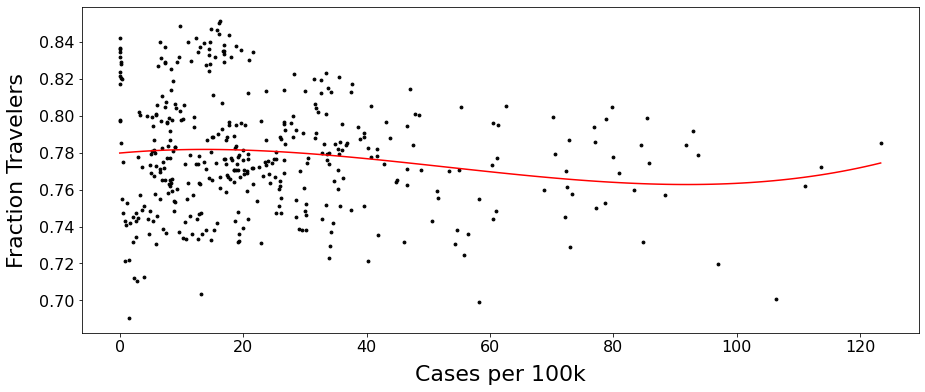

Cross-validated MSE: 0.003738551295688375


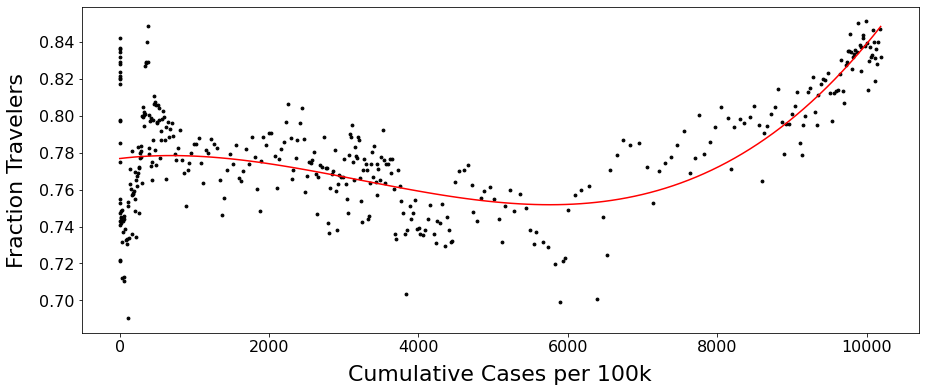

Cross-validated MSE: 6.373635677151136


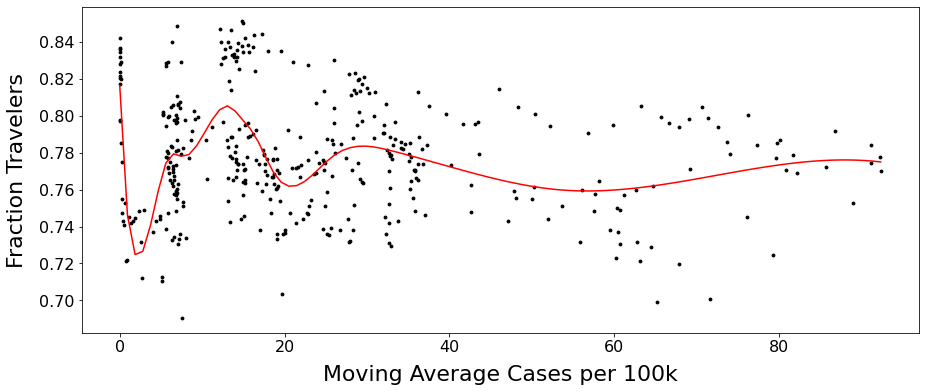

Cross-validated MSE: 0.015308272634759567


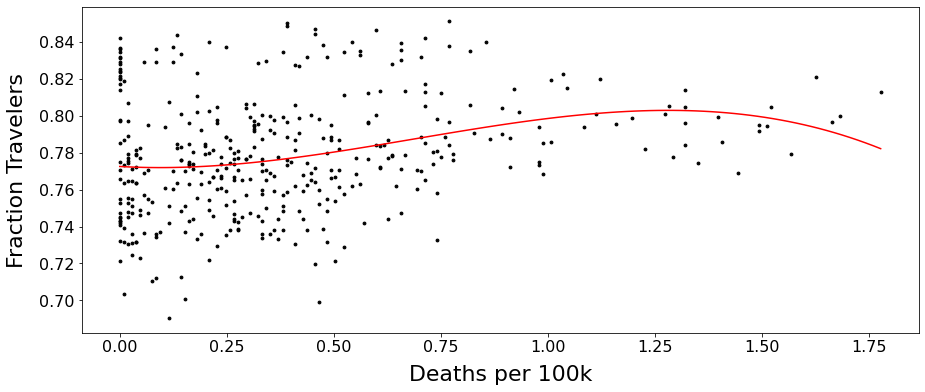

Cross-validated MSE: 0.004073780912758114


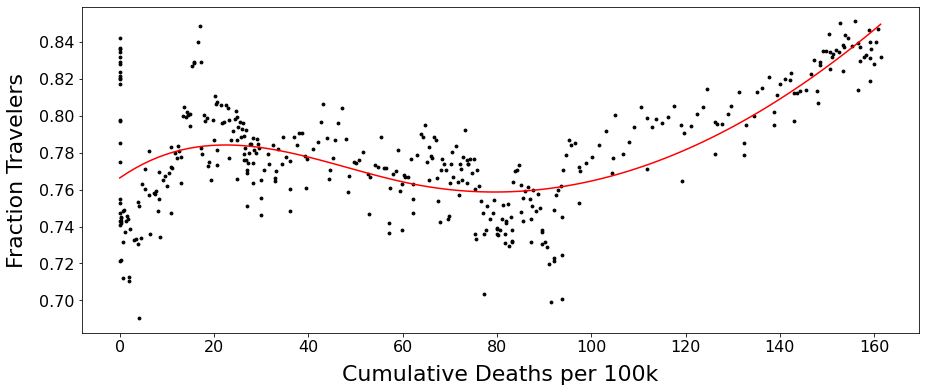

Cross-validated MSE: 0.037178212674378965


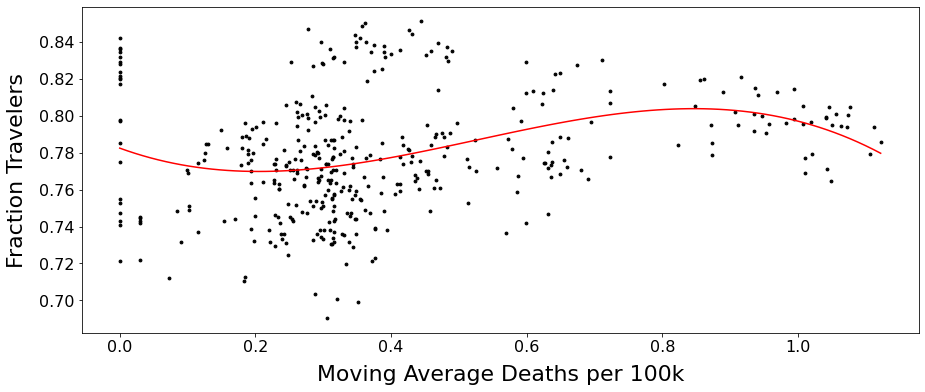

In [9]:
dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Population")
state_smoothing = [0.4,0.3,0.3,0.5,0.2,0.5]
for i in range(len(state_X.columns)):
    spline_wrapper(state_X, state_y, state_X.columns[i], feature_labels[i], state_smoothing[i], "Fraction Travelers")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.4784497552051685


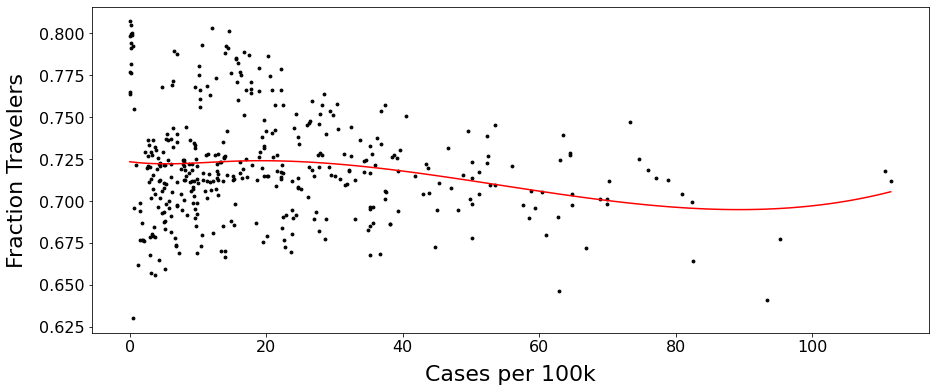

Cross-validated MSE: 0.002012939160817654


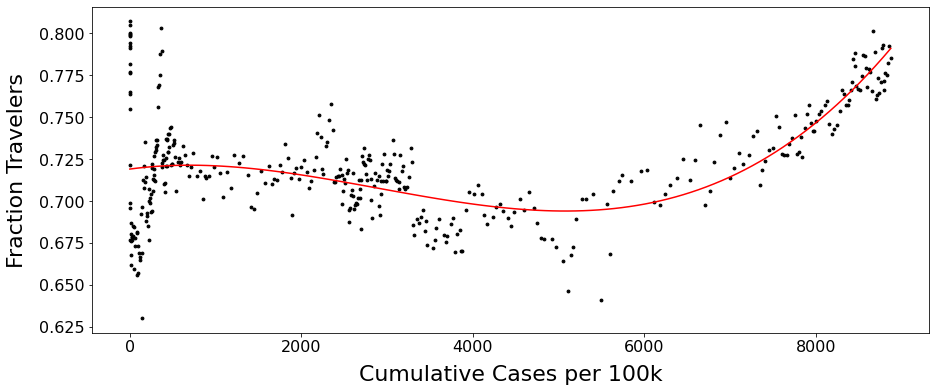

Cross-validated MSE: 0.07348366228351691


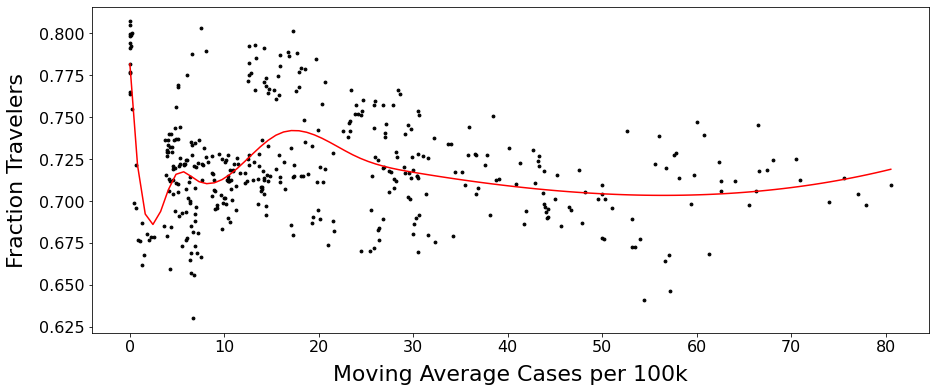

Cross-validated MSE: 0.10395701988062209


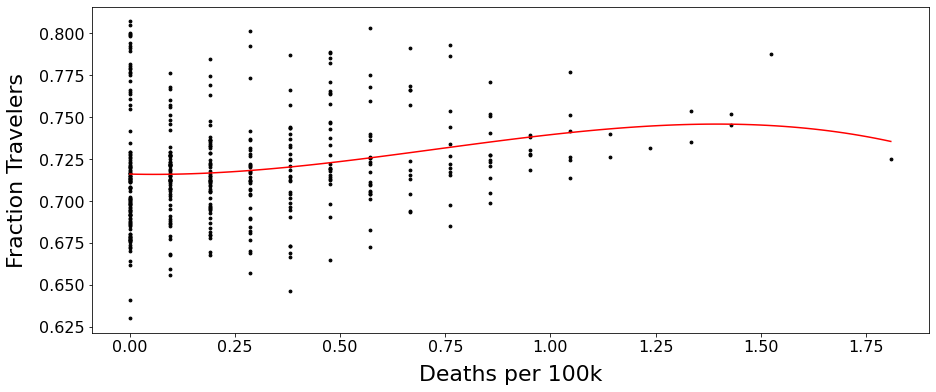

Cross-validated MSE: 0.002110068786603217


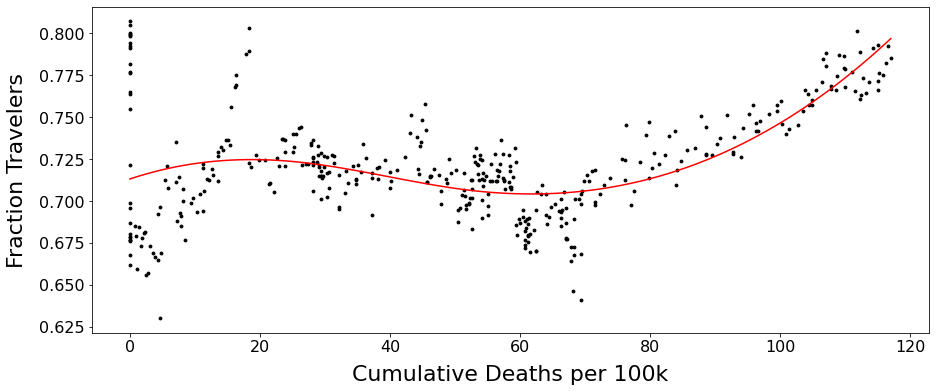

Cross-validated MSE: 0.0011599862591522656


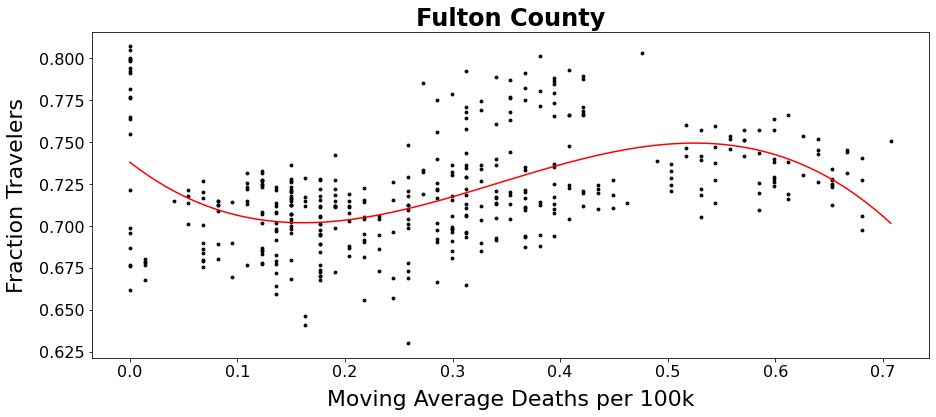

In [22]:
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Population")
fulton_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
save_list = [False, False, False, False, False, True]
for i in range(len(fulton_X.columns)):
    spline_wrapper(fulton_X, fulton_y, fulton_X.columns[i], feature_labels[i], fulton_smoothing[i], "Fraction Travelers", save=save_list[i], save_county="Fulton County")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.6290691308172608


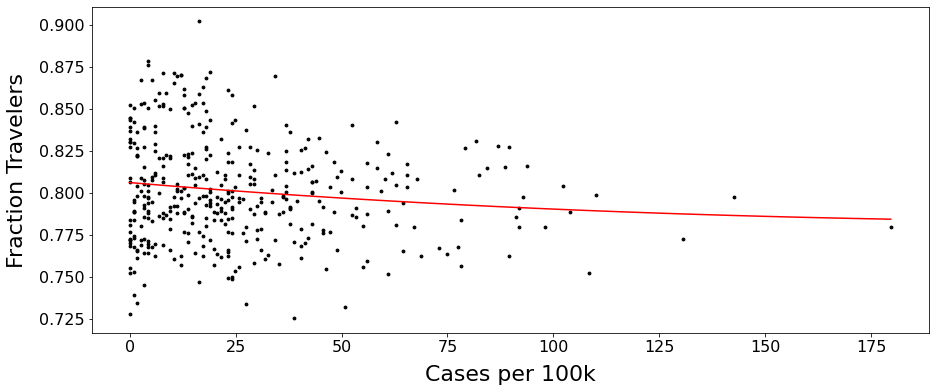

Cross-validated MSE: 0.000794664003648864


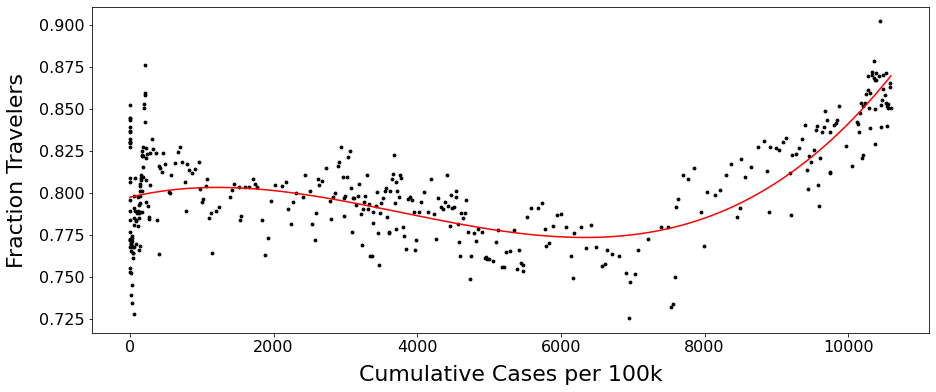

Cross-validated MSE: 0.02367500072413715


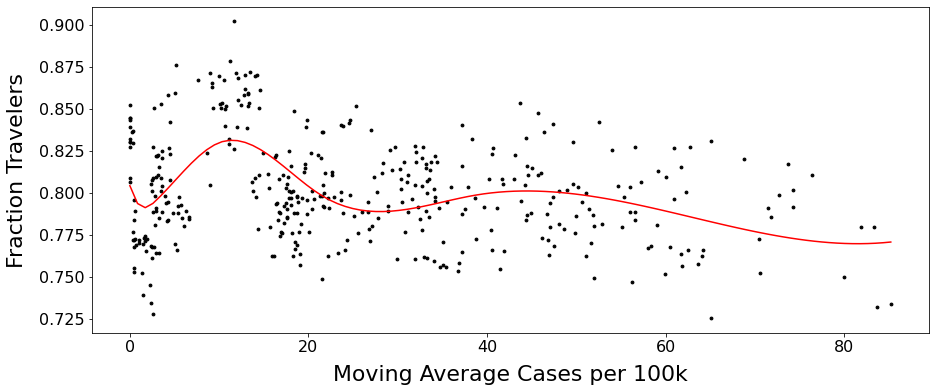

Cross-validated MSE: nan


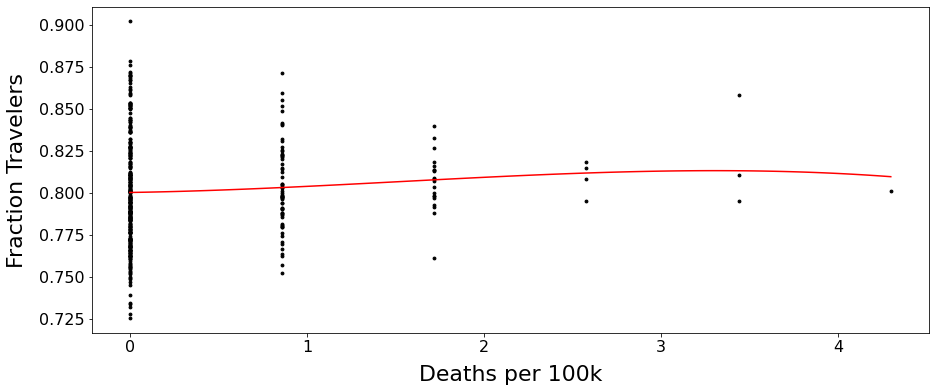

Cross-validated MSE: 0.0014794055791584923


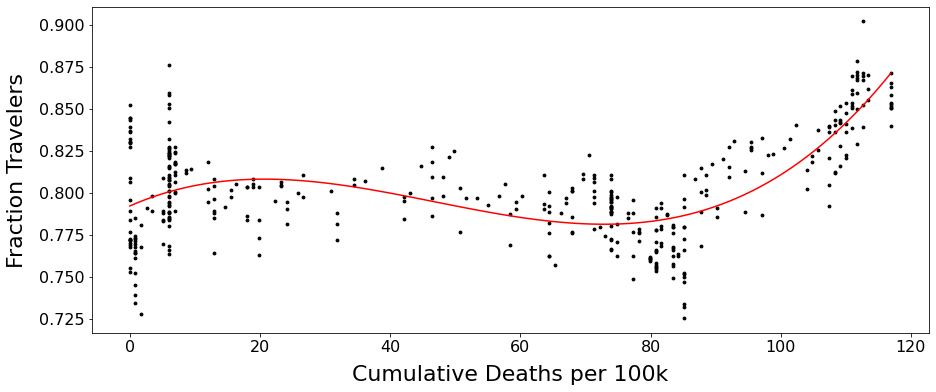

Cross-validated MSE: 0.28193246837841873


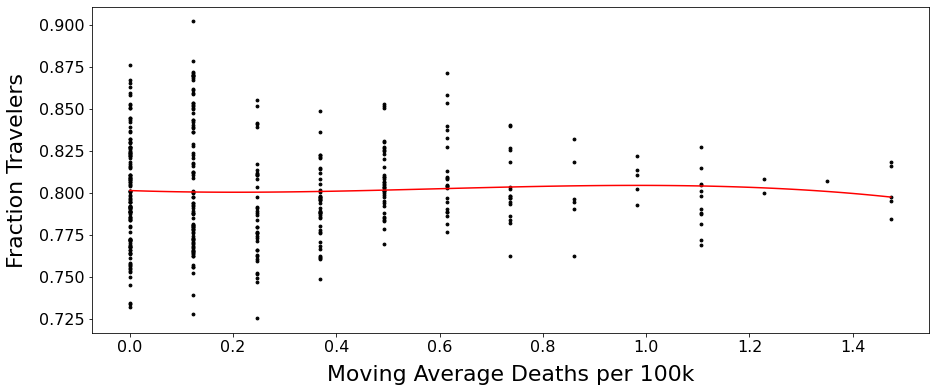

In [11]:
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Population")
lowndes_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(lowndes_X.columns)):
    spline_wrapper(lowndes_X, lowndes_y, lowndes_X.columns[i], feature_labels[i], lowndes_smoothing[i], "Fraction Travelers")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.0009456948139097372


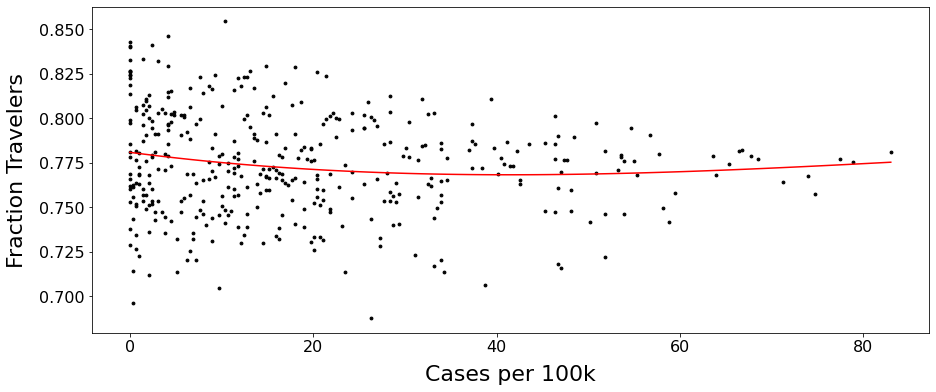

Cross-validated MSE: 0.0032061497211235907


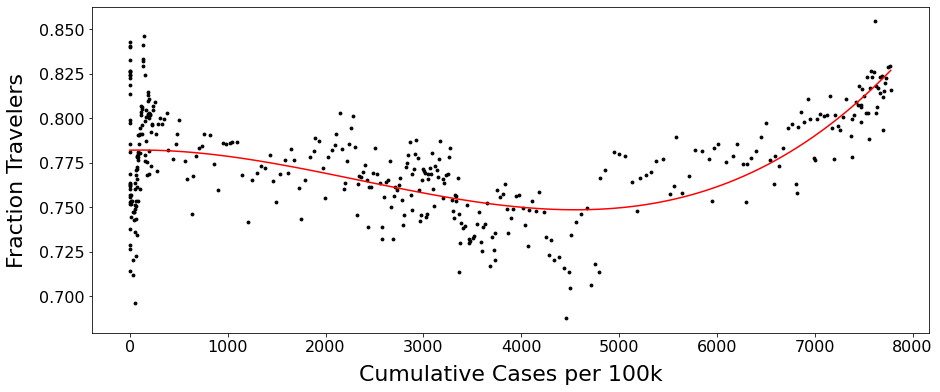

Cross-validated MSE: 0.0012892866107887778


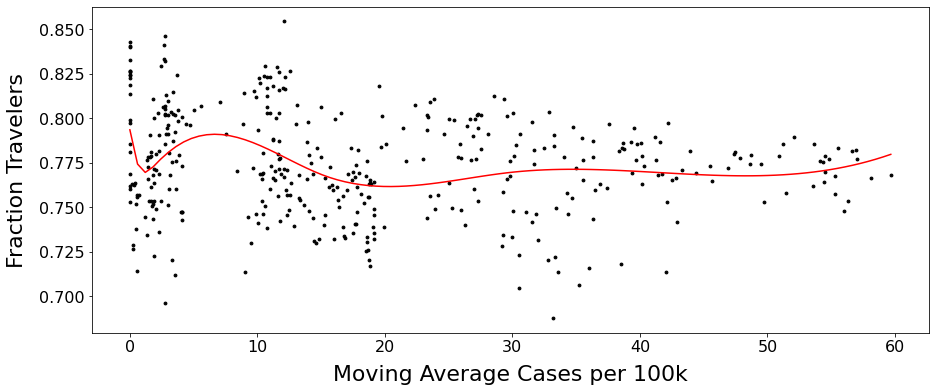

Cross-validated MSE: 4.318660253812263e+28


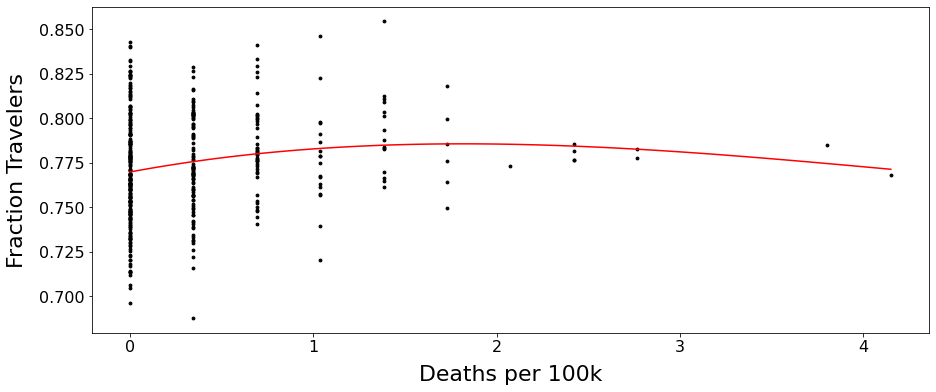

Cross-validated MSE: 0.0028043776666003667


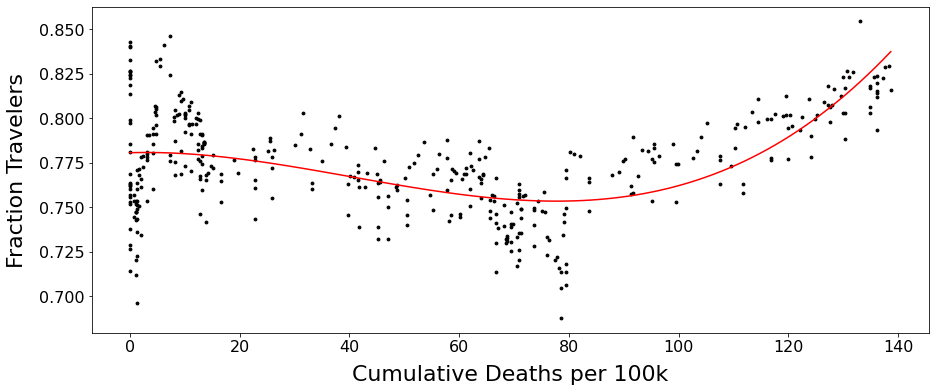

Cross-validated MSE: 0.0008455803840163618


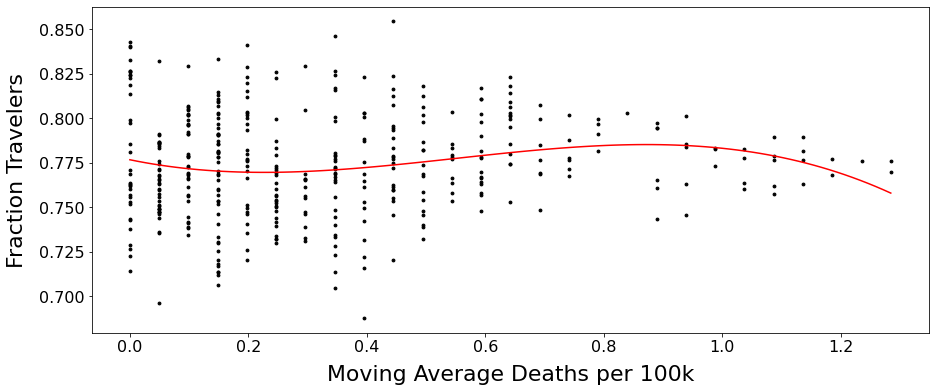

In [12]:
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Population")
chatham_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(chatham_X.columns)):
    spline_wrapper(chatham_X, chatham_y, chatham_X.columns[i], feature_labels[i], chatham_smoothing[i], "Fraction Travelers")

# Long Trips

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.003126746222911308


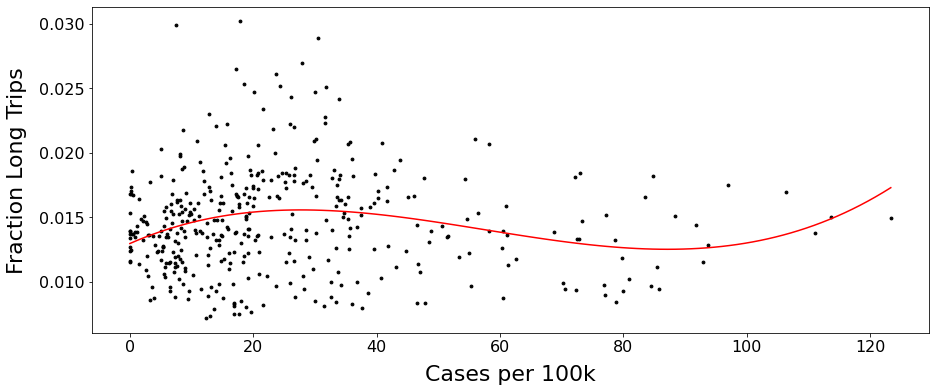

Cross-validated MSE: 6.293884231339296e-05


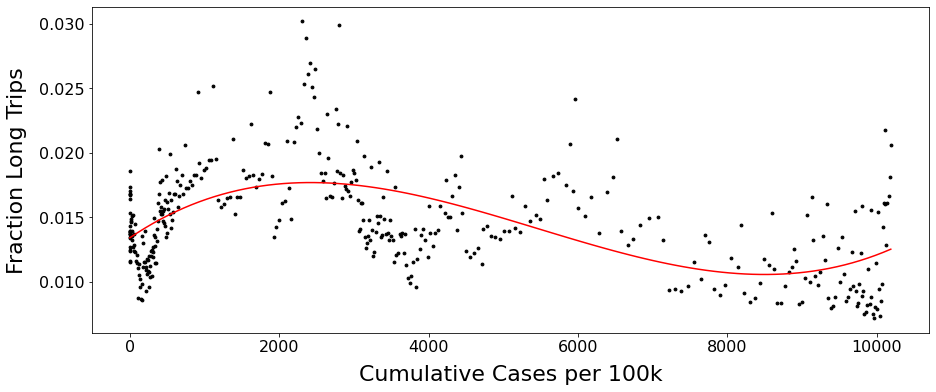

Cross-validated MSE: 0.0009049647315541124


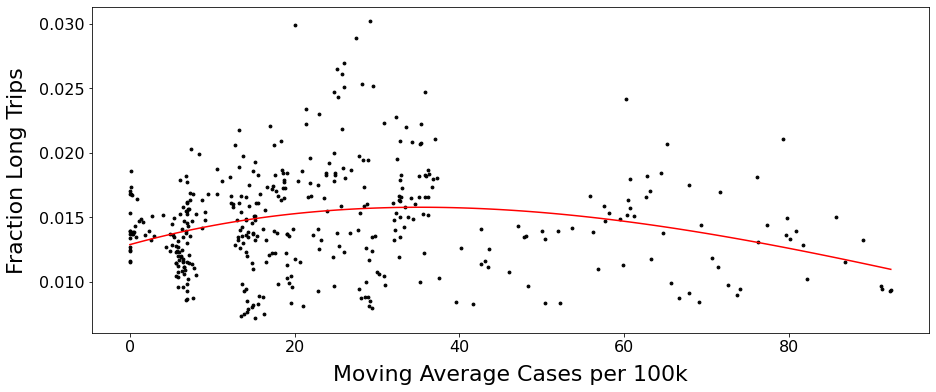

Cross-validated MSE: 0.00013707095169083433


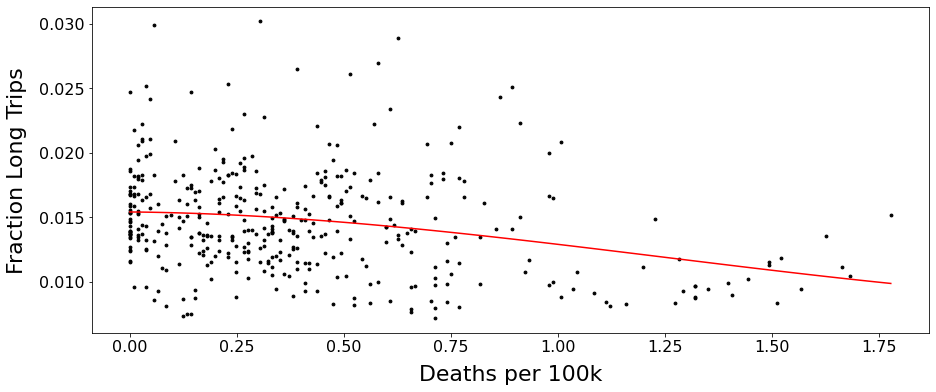

Cross-validated MSE: 1.1287509474700972e-05


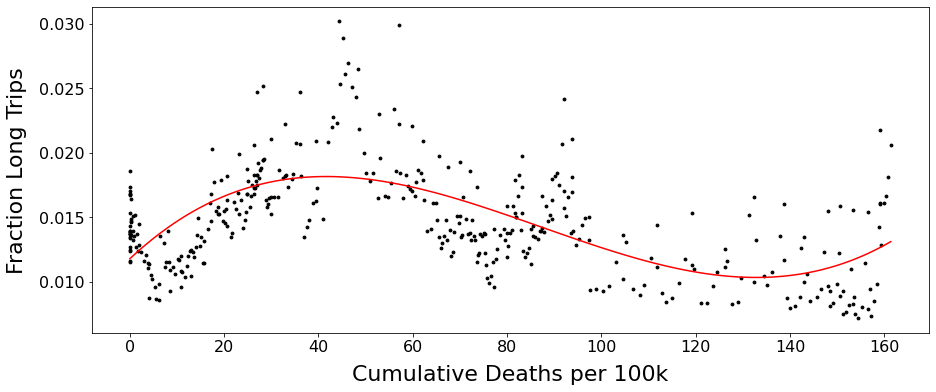

Cross-validated MSE: 0.0018649857646361567


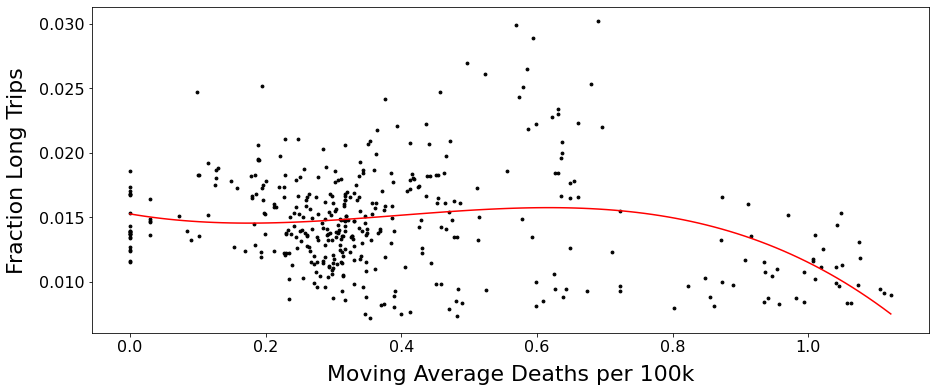

In [13]:
dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Long")
state_smoothing = [0.4,0.3,0.3,0.5,0.2,0.5]
for i in range(len(state_X.columns)):
    spline_wrapper(state_X, state_y, state_X.columns[i], feature_labels[i], state_smoothing[i], "Fraction Long Trips")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.0012441555059591238


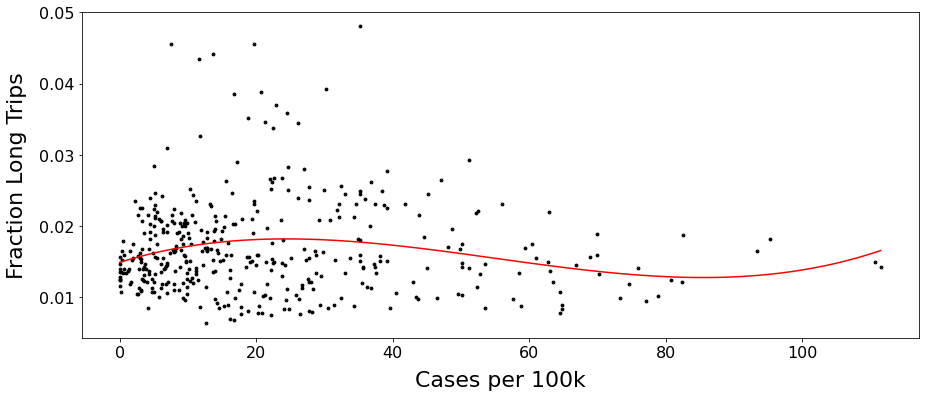

Cross-validated MSE: 0.0003396988436300734


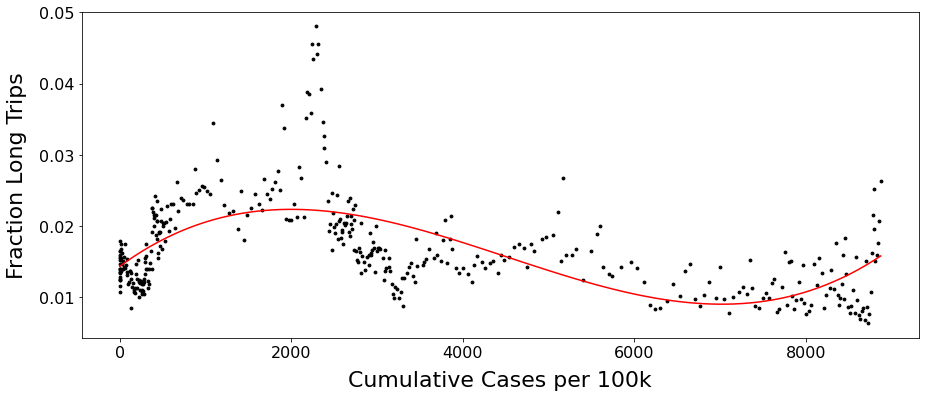

Cross-validated MSE: 4.1435568357289474e-05


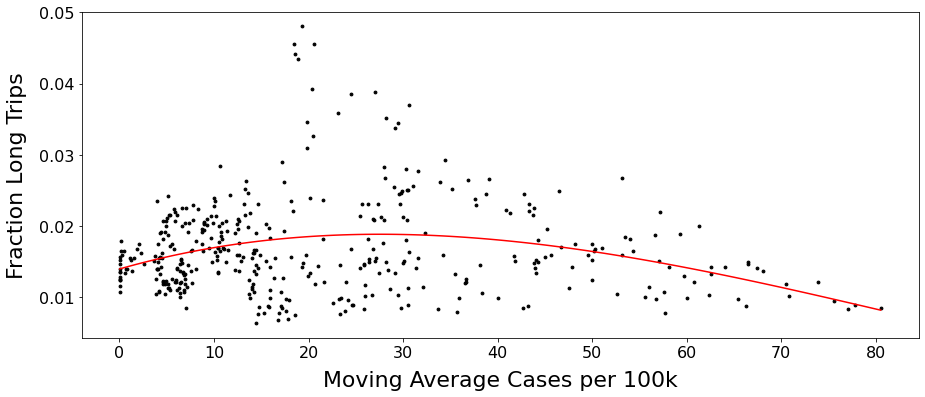

Cross-validated MSE: 0.0013649941753332542


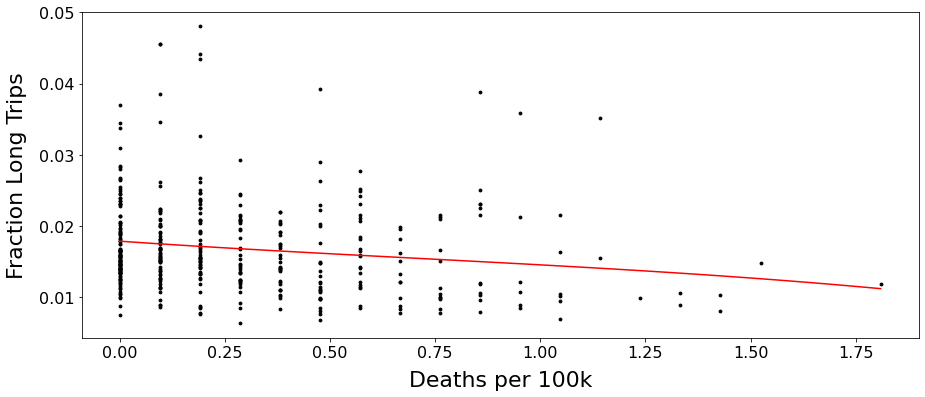

Cross-validated MSE: 0.0004321172963444173


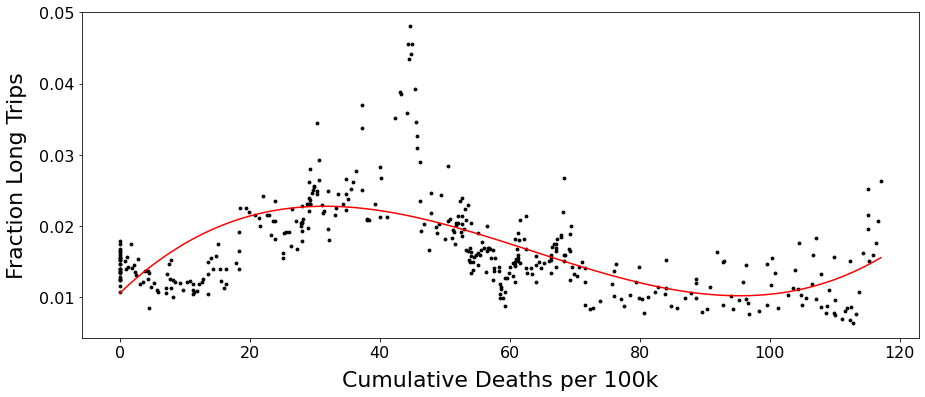

Cross-validated MSE: 0.00010629964615330371


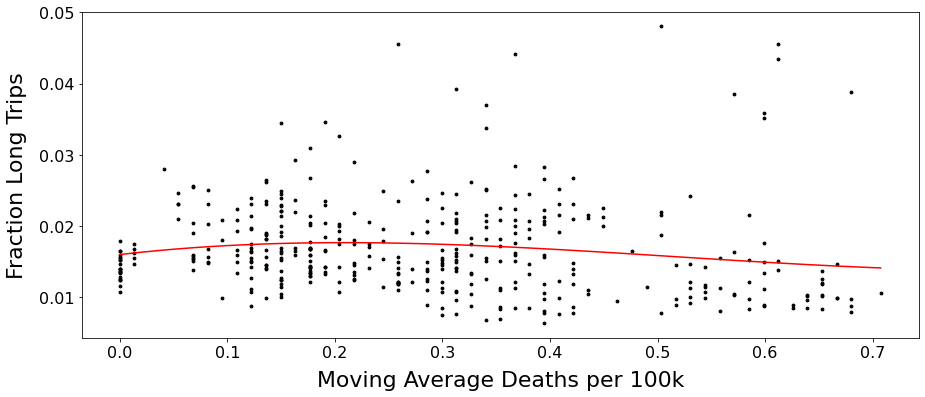

In [14]:
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Long")
fulton_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(fulton_X.columns)):
    spline_wrapper(fulton_X, fulton_y, fulton_X.columns[i], feature_labels[i], fulton_smoothing[i], "Fraction Long Trips")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.03243154007562825


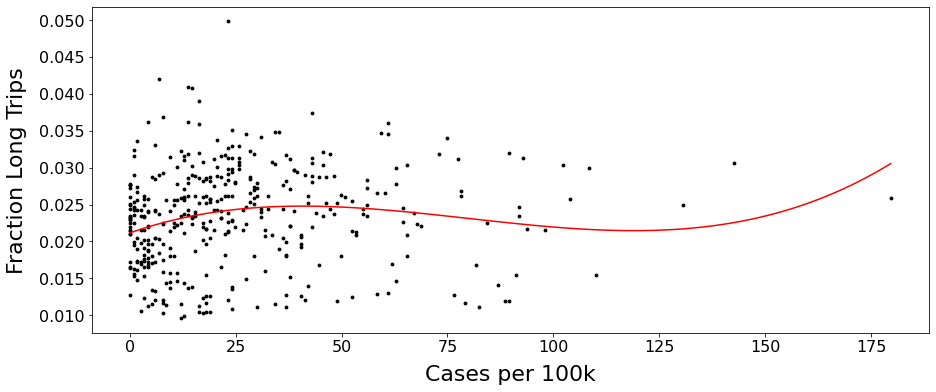

Cross-validated MSE: 6.964450909044586e-05


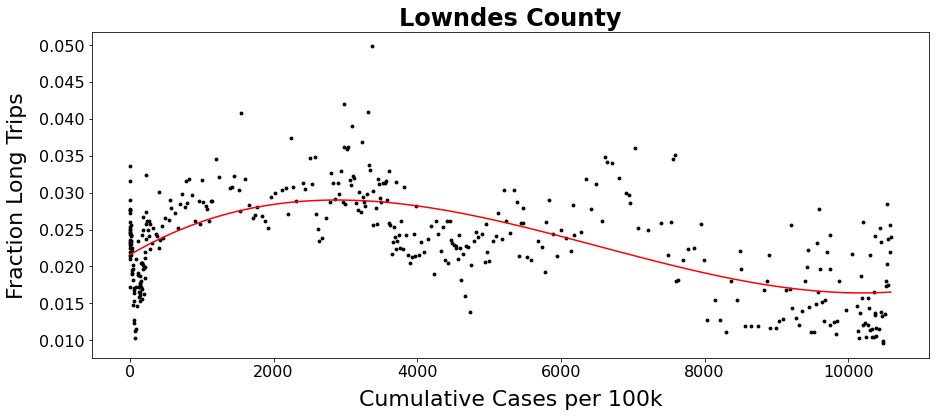

Cross-validated MSE: 0.00048452892834044794


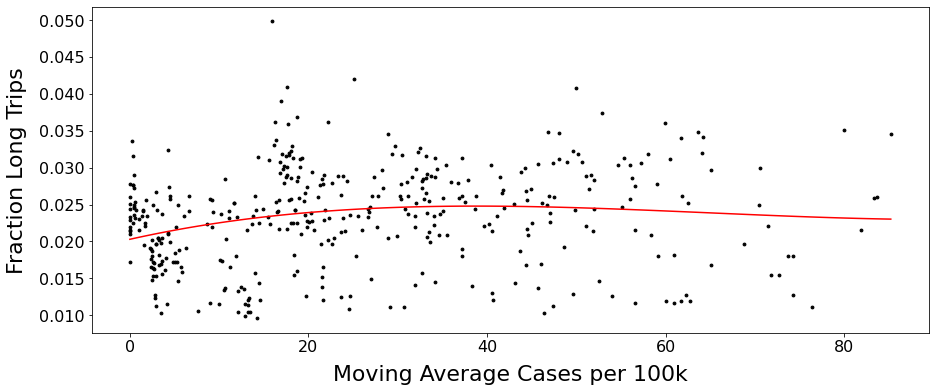

Cross-validated MSE: nan


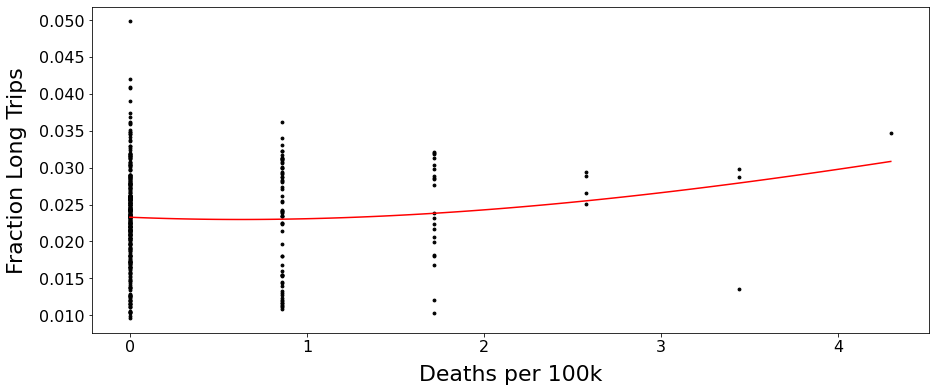

Cross-validated MSE: 3.0575339961113335e-05


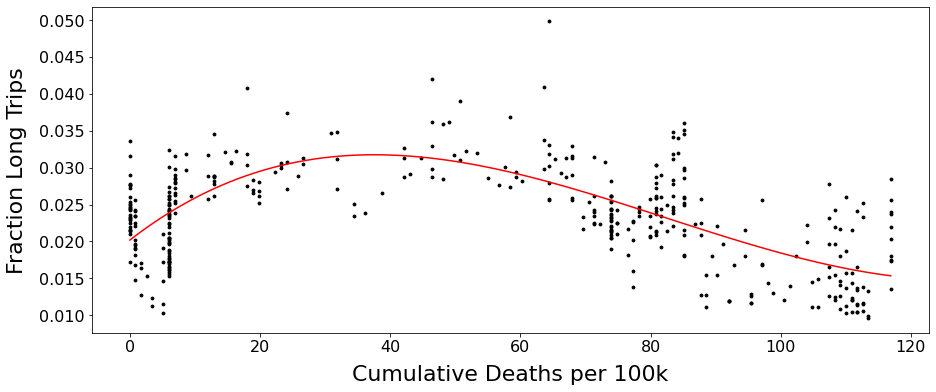

Cross-validated MSE: 0.0035982814322336036


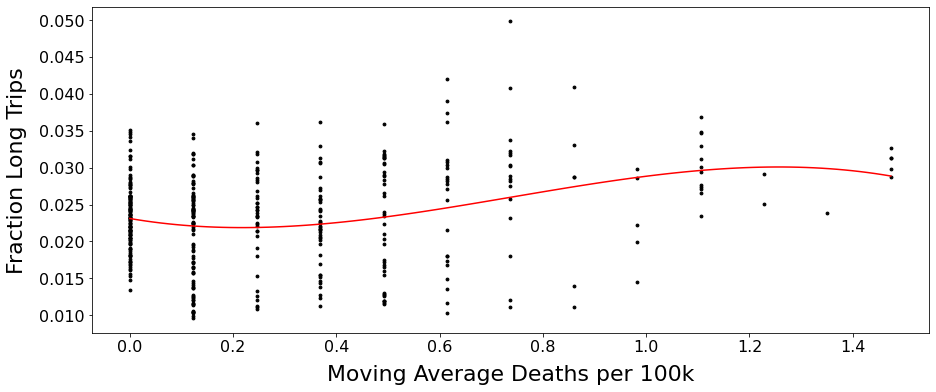

In [23]:
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Long")
lowndes_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
save_list = [False, True, False, False, False, False]
for i in range(len(lowndes_X.columns)):
    spline_wrapper(lowndes_X, lowndes_y, lowndes_X.columns[i], feature_labels[i], lowndes_smoothing[i], "Fraction Long Trips",save=save_list[i],save_county="Lowndes County")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 2.8266247489693734e-05


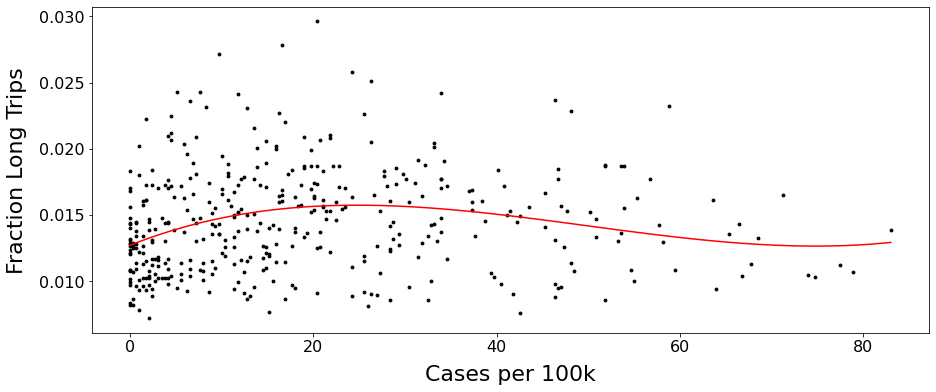

Cross-validated MSE: 0.00010151299008941696


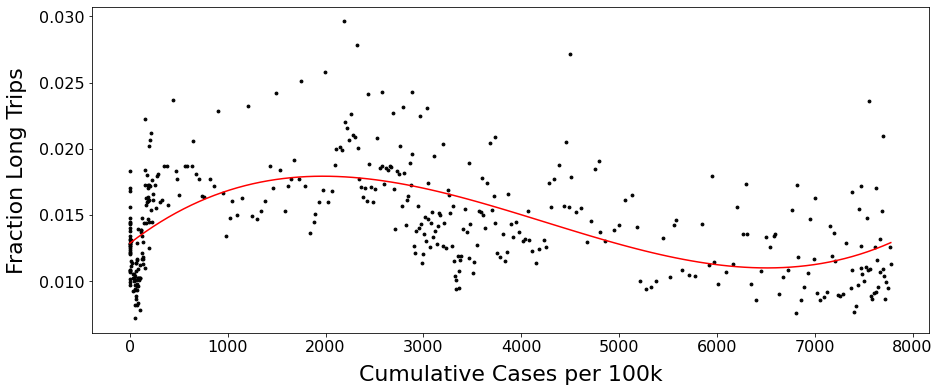

Cross-validated MSE: 2.098657653443518e-05


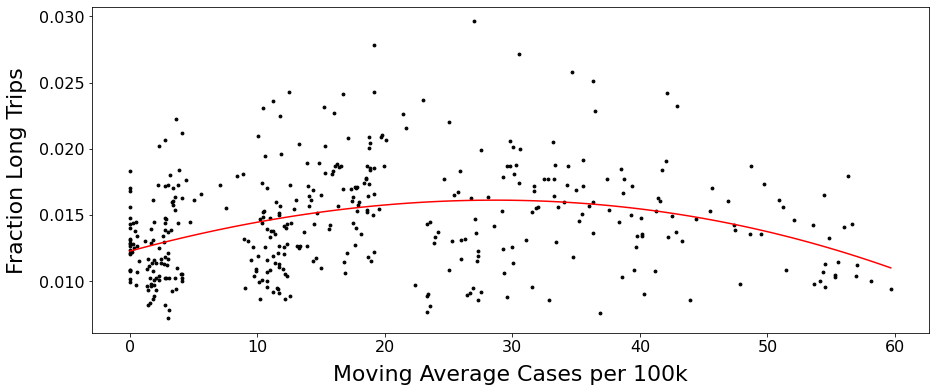

Cross-validated MSE: 1.2515941006608904e+28


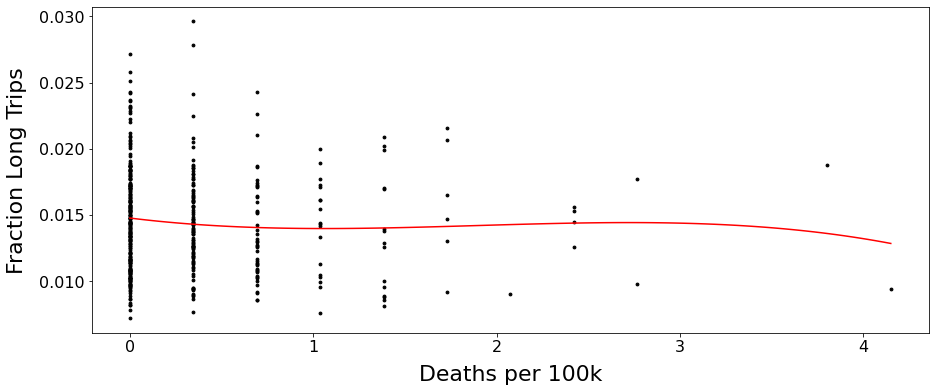

Cross-validated MSE: 9.500045554098835e-05


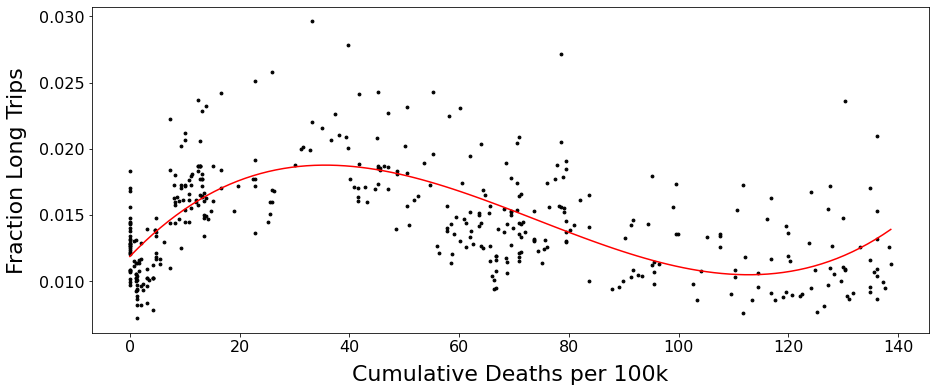

Cross-validated MSE: 2.4576356618021293e-05


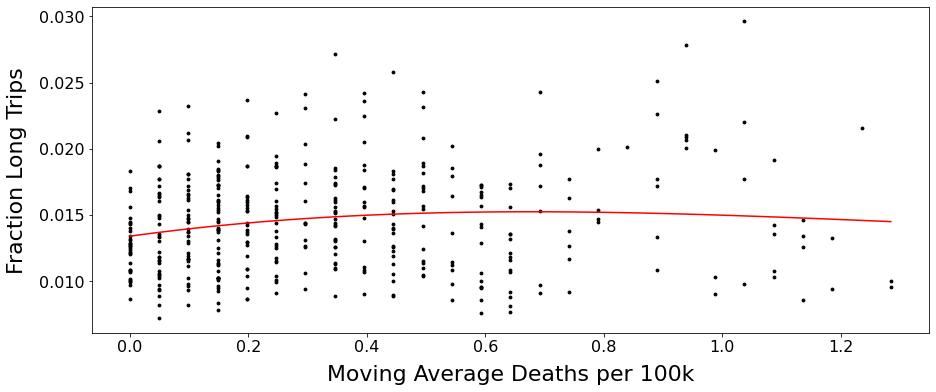

In [16]:
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Long")
chatham_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(chatham_X.columns)):
    spline_wrapper(chatham_X, chatham_y, chatham_X.columns[i], feature_labels[i], chatham_smoothing[i], "Fraction Long Trips")

# Medium Trips

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.03435864130968767


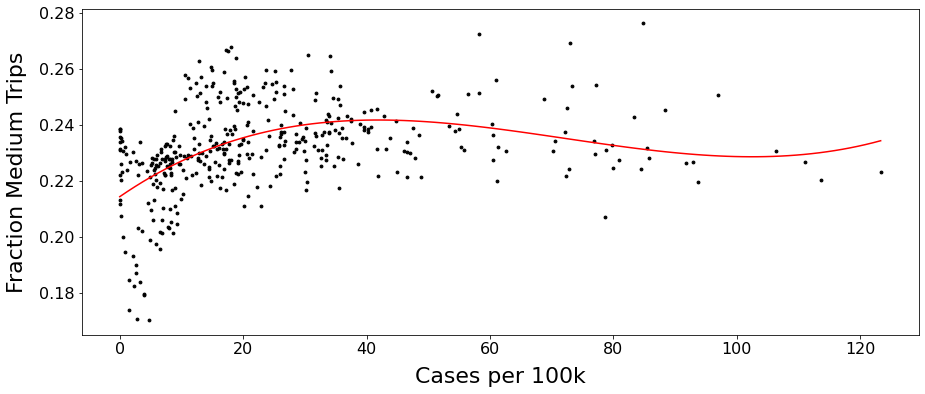

Cross-validated MSE: 0.00020045703782001407


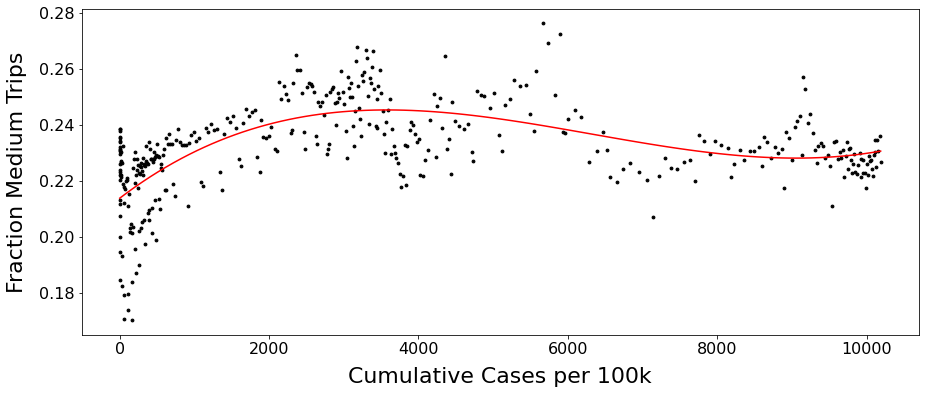

Cross-validated MSE: 0.02864548513929586


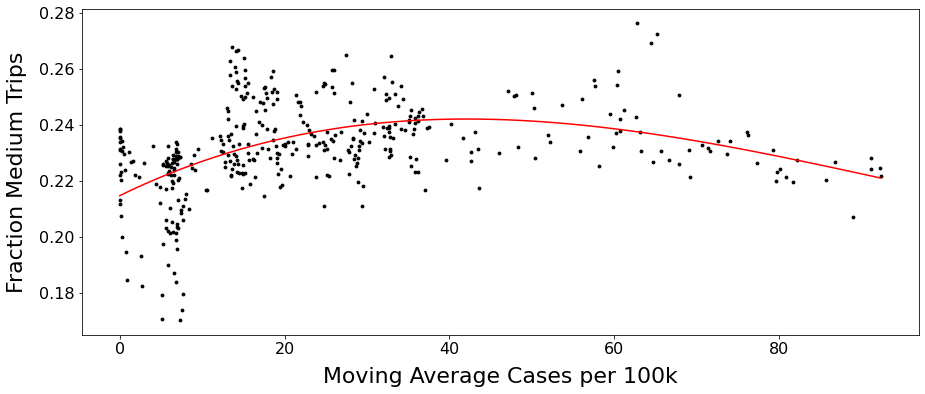

Cross-validated MSE: 0.006469777537383085


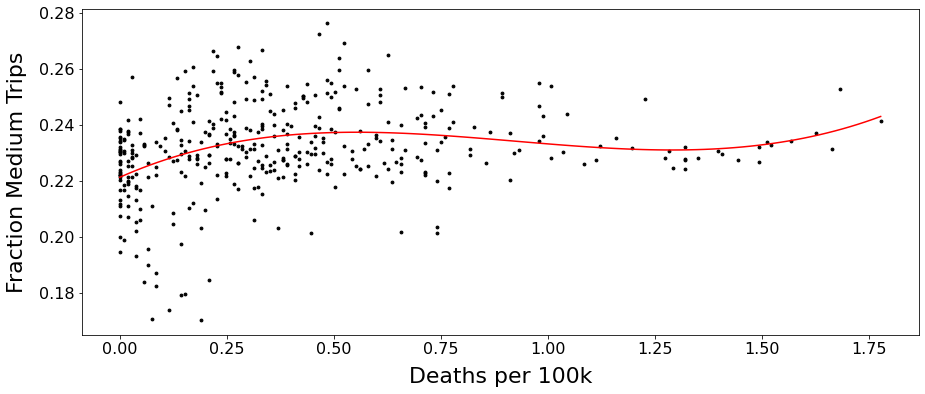

Cross-validated MSE: 0.003497624610481449


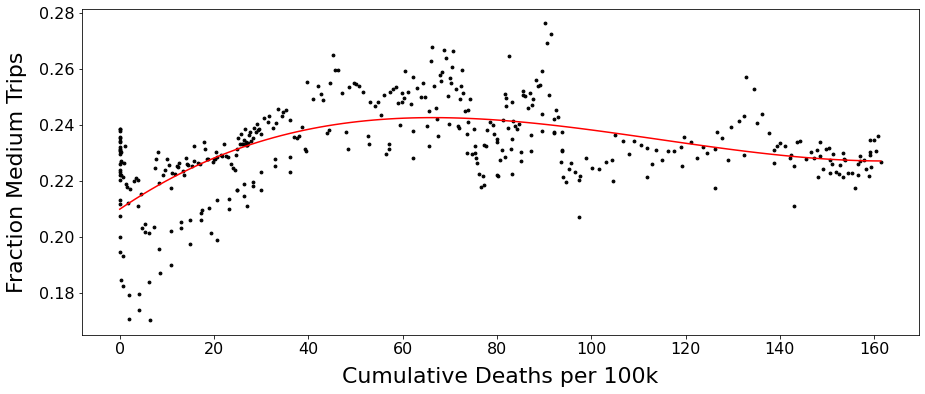

Cross-validated MSE: 0.002058005276417122


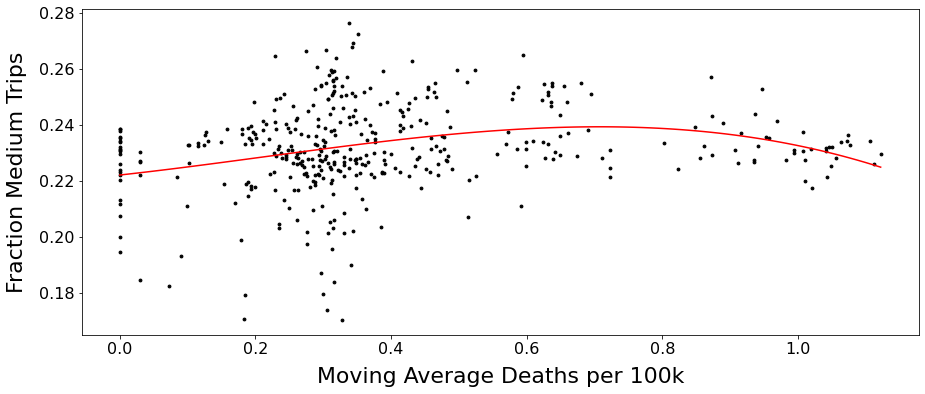

In [17]:
dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Medium")
state_smoothing = [0.4,0.3,0.3,0.5,0.2,0.5]
for i in range(len(state_X.columns)):
    spline_wrapper(state_X, state_y, state_X.columns[i], feature_labels[i], state_smoothing[i], "Fraction Medium Trips")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.05804565321217211


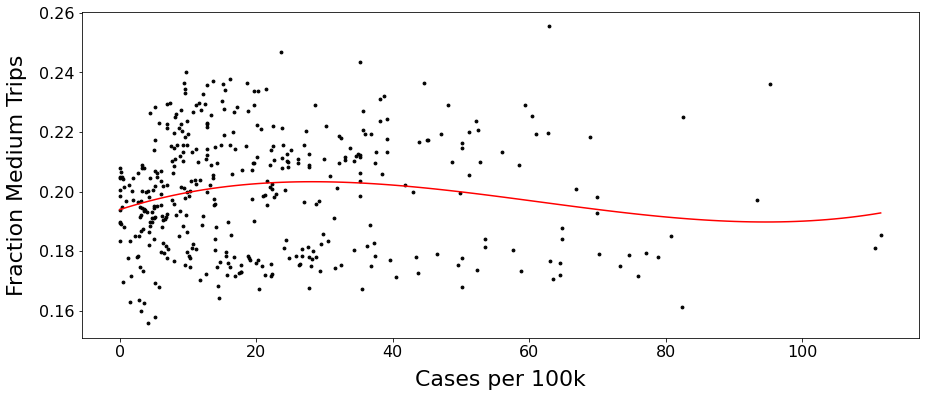

Cross-validated MSE: 0.0006277919150858202


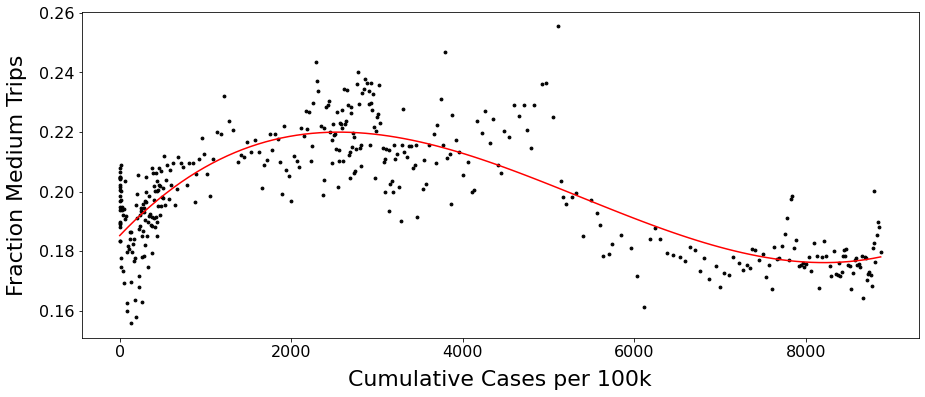

Cross-validated MSE: 0.006979571299151659


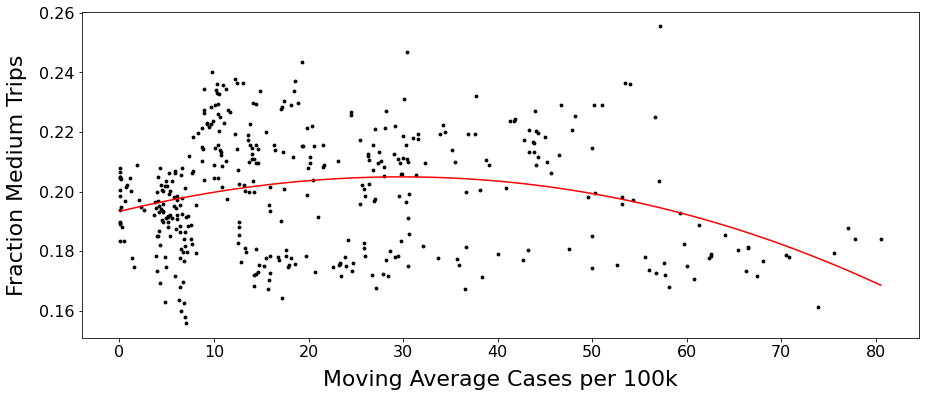

Cross-validated MSE: 0.0009427250484286695


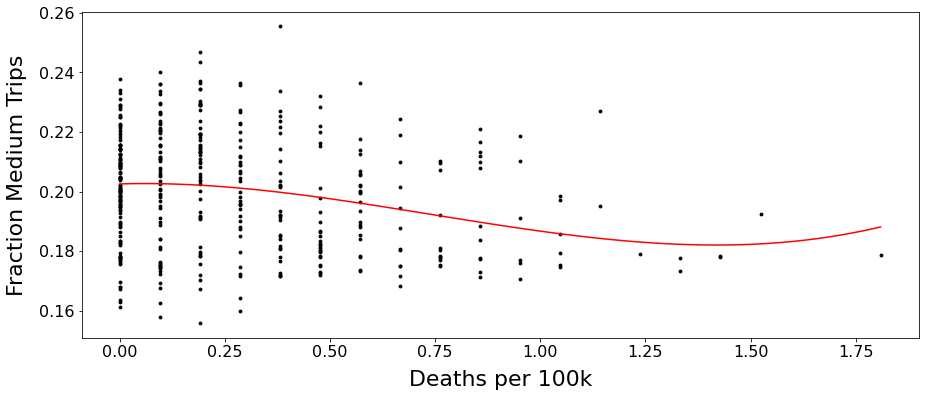

Cross-validated MSE: 0.012717829660181312


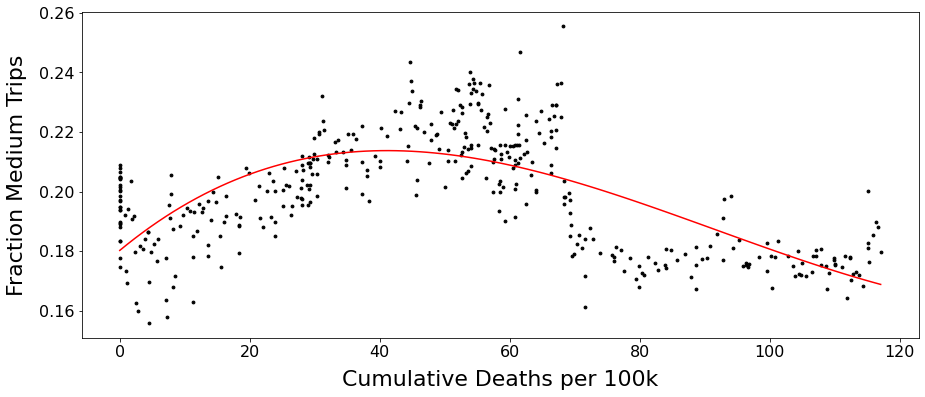

Cross-validated MSE: 0.0012912593330819528


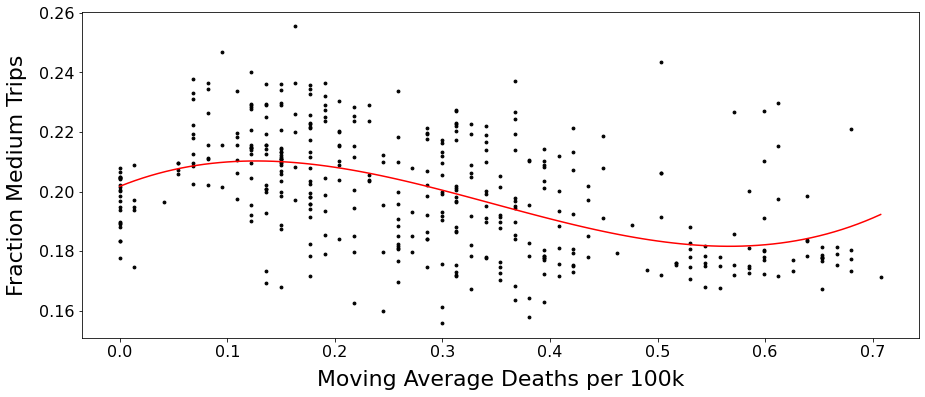

In [18]:
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Medium")
fulton_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(fulton_X.columns)):
    spline_wrapper(fulton_X, fulton_y, fulton_X.columns[i], feature_labels[i], fulton_smoothing[i], "Fraction Medium Trips")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.032591972374301476


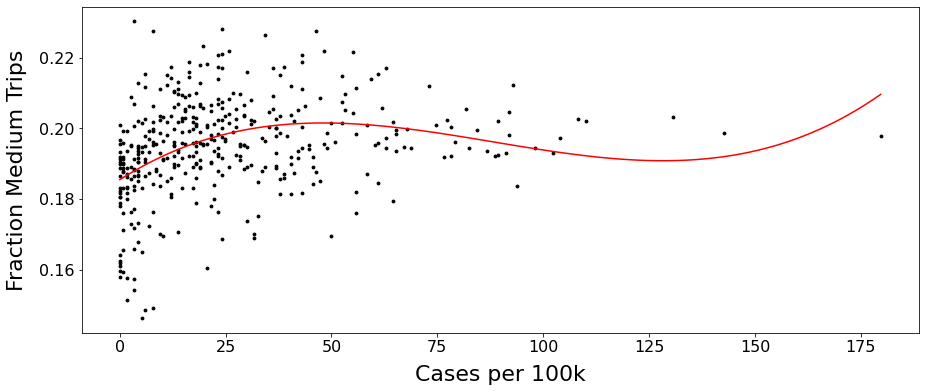

Cross-validated MSE: 0.0001971245839102758


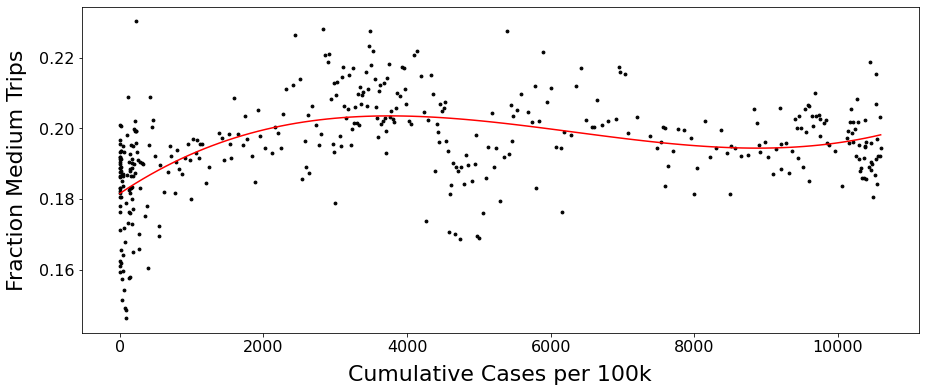

Cross-validated MSE: 0.0003515603975867559


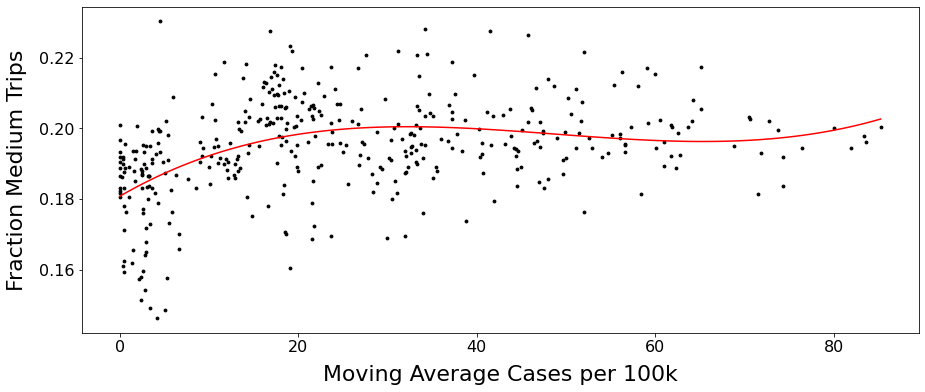

Cross-validated MSE: nan


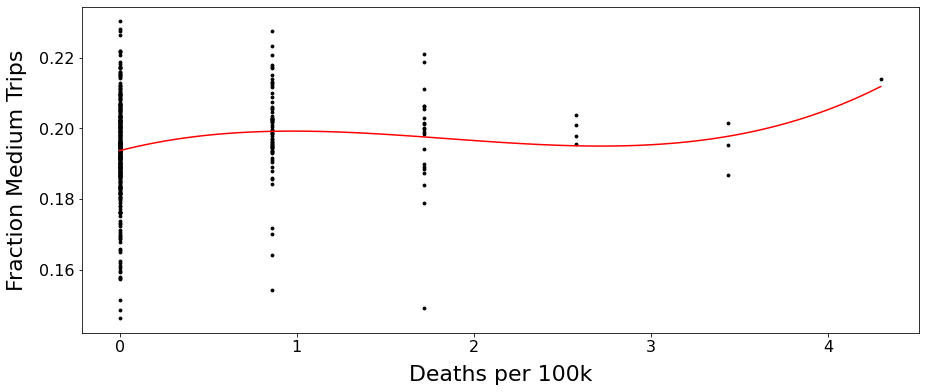

Cross-validated MSE: 0.00025799393129045657


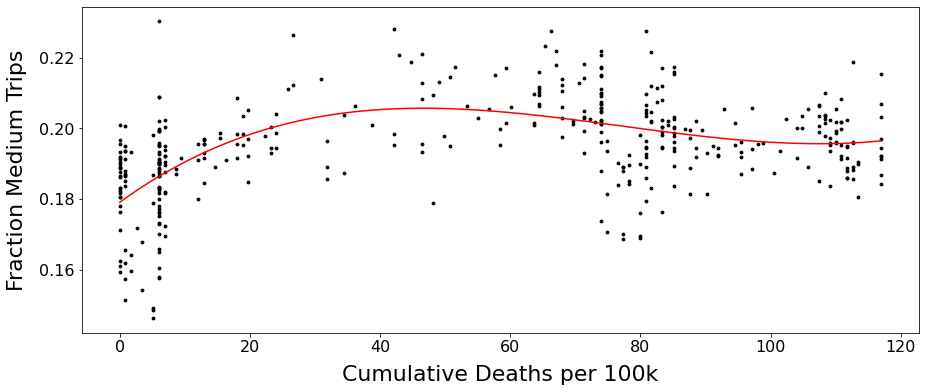

Cross-validated MSE: 0.0033492777059780502


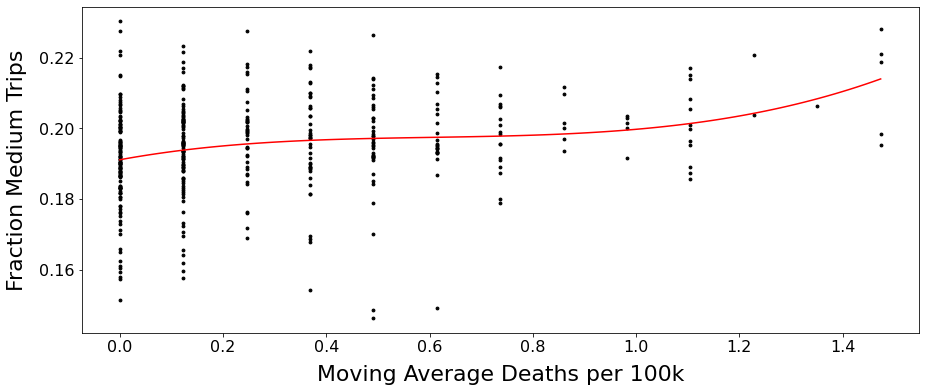

In [19]:
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Medium")
lowndes_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(lowndes_X.columns)):
    spline_wrapper(lowndes_X, lowndes_y, lowndes_X.columns[i], feature_labels[i], lowndes_smoothing[i], "Fraction Medium Trips")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.0029632806320489427


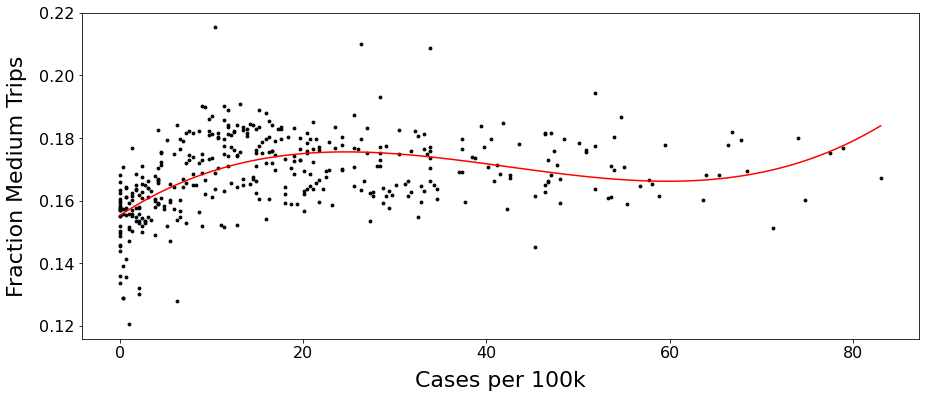

Cross-validated MSE: 0.00015720292481917017


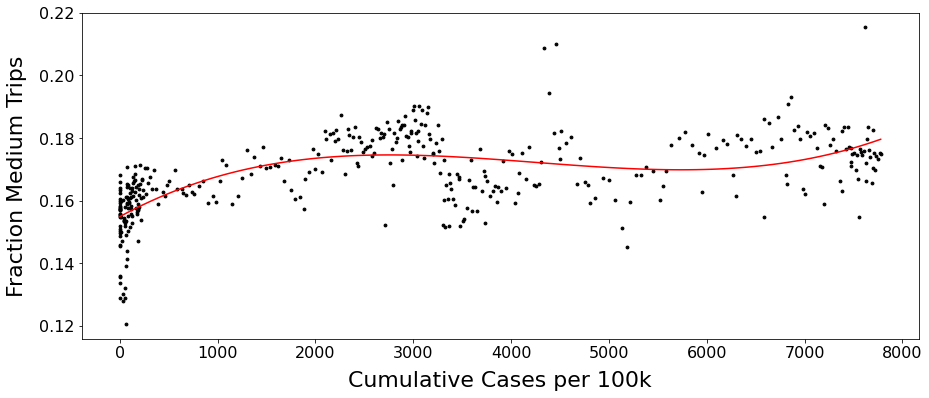

Cross-validated MSE: 0.0017361299536641968


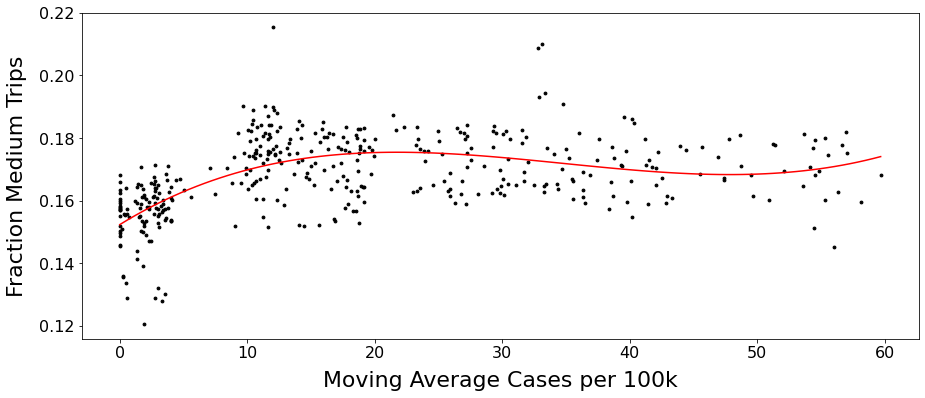

Cross-validated MSE: 2.4872483837385994e+28


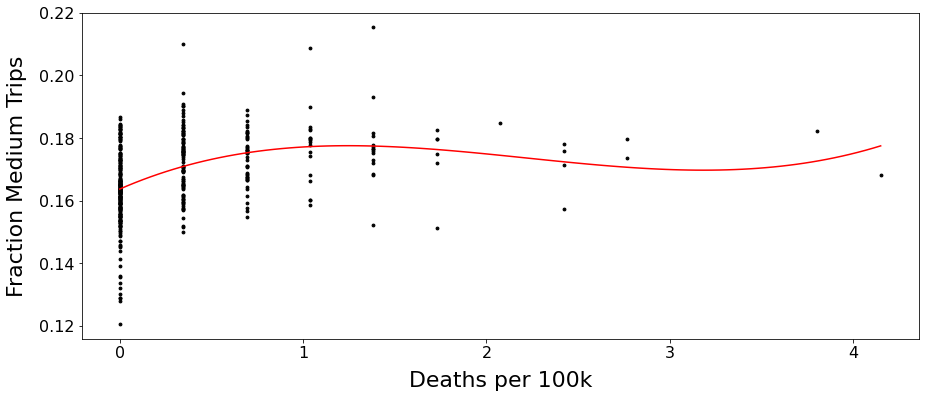

Cross-validated MSE: 0.00014496104112773477


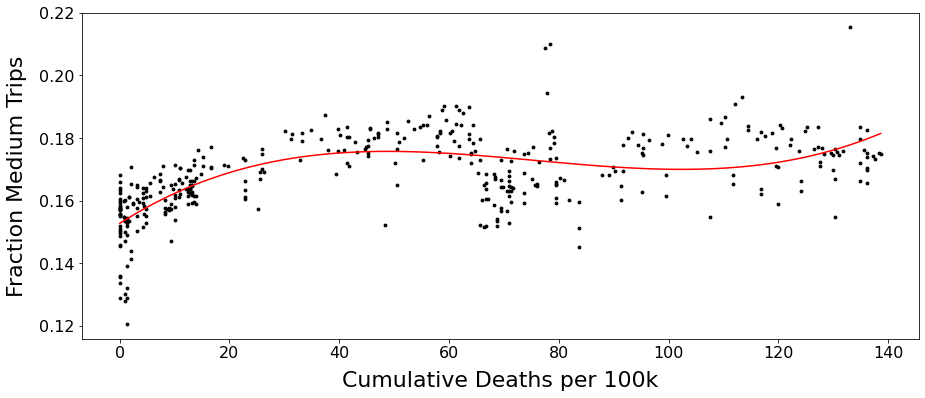

Cross-validated MSE: 0.0004676576525885903


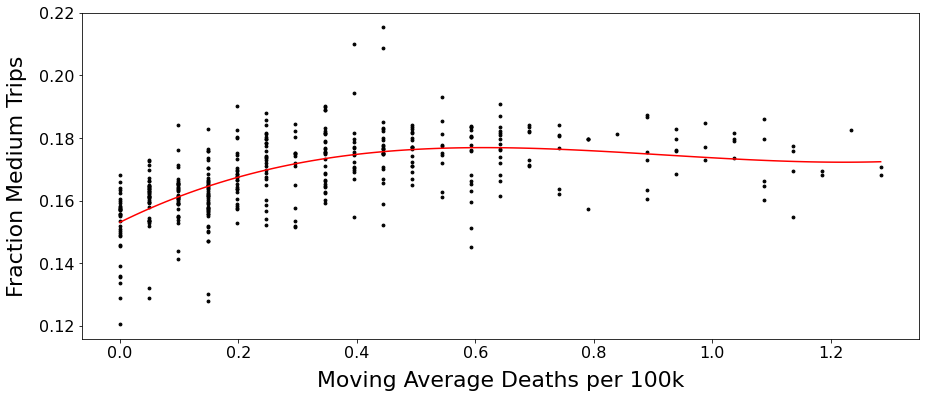

In [24]:
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Medium")
chatham_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(chatham_X.columns)):
    spline_wrapper(chatham_X, chatham_y, chatham_X.columns[i], feature_labels[i], chatham_smoothing[i], "Fraction Medium Trips")

# Short Trips

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.05807253840854859


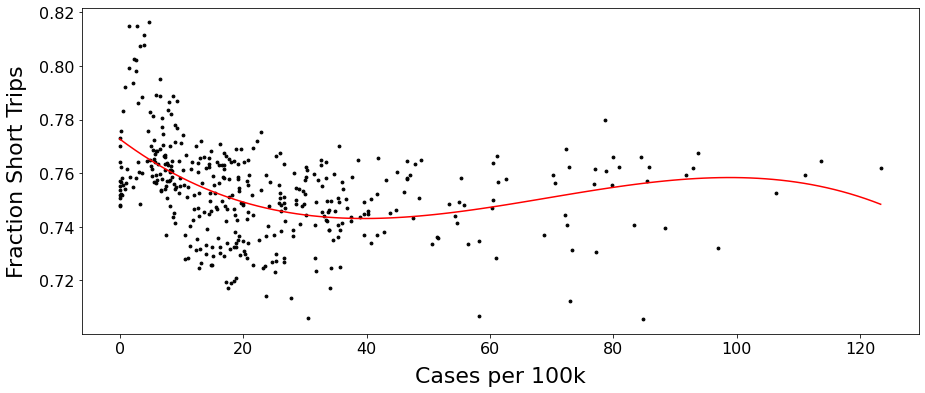

Cross-validated MSE: 0.00021013206715554743


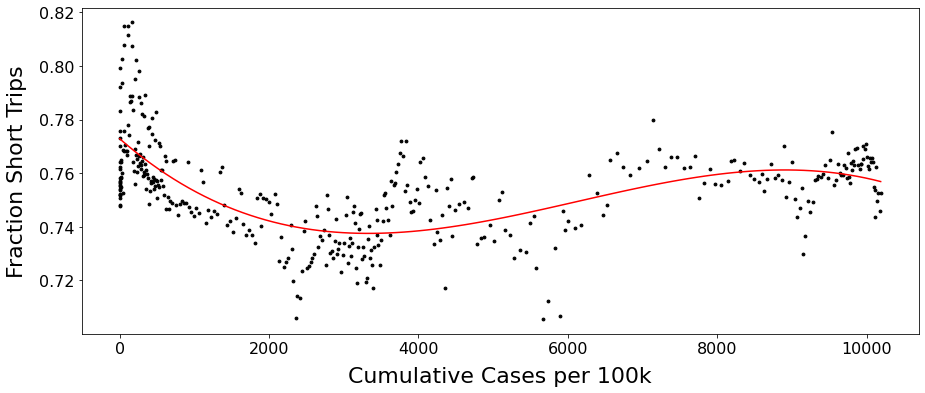

Cross-validated MSE: 0.039605766206313876


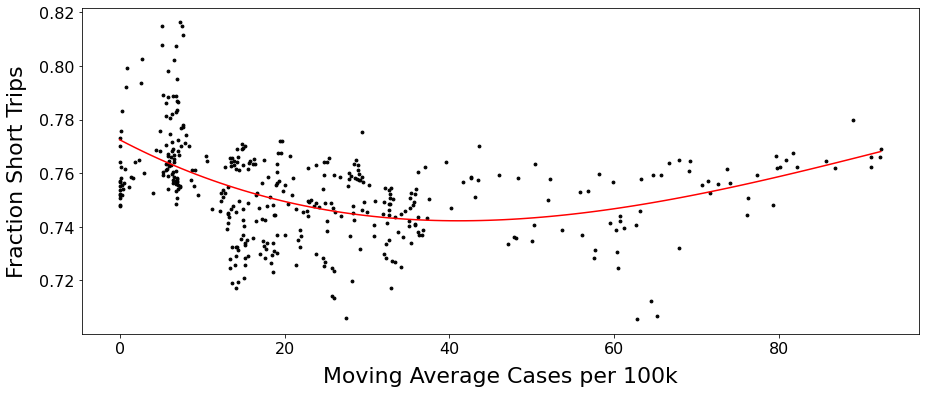

Cross-validated MSE: 0.004946124253835122


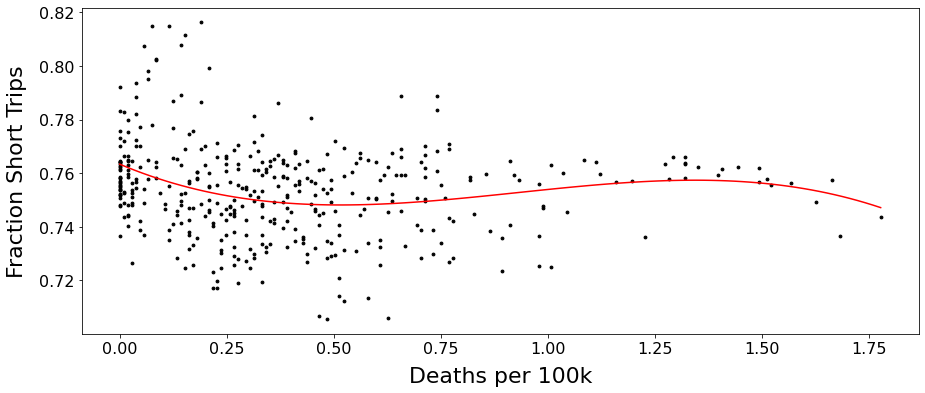

Cross-validated MSE: 0.0036209545063198


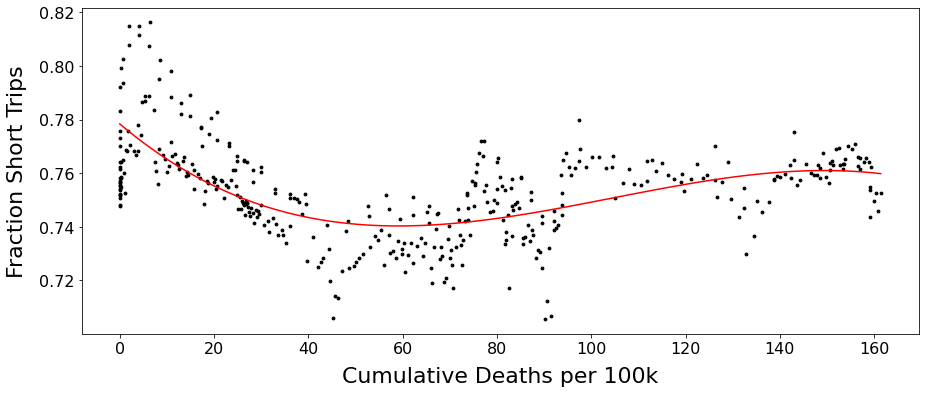

Cross-validated MSE: 0.0003532306896196212


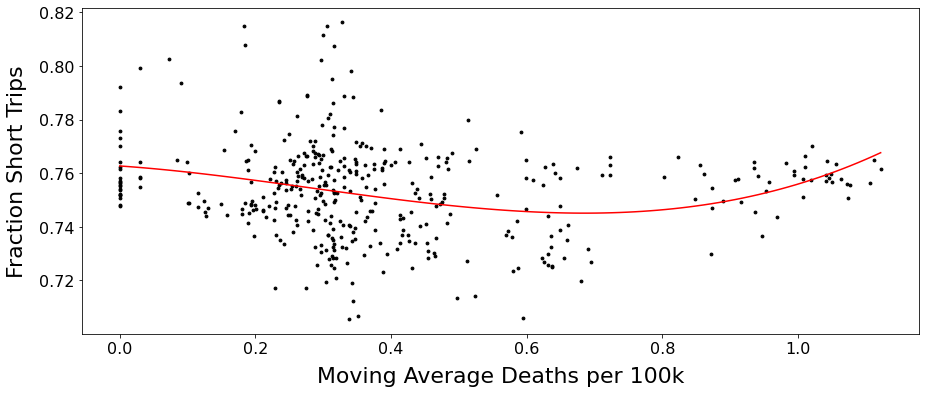

In [25]:
dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Short")
state_smoothing = [0.4,0.3,0.3,0.5,0.2,0.5]
for i in range(len(state_X.columns)):
    spline_wrapper(state_X, state_y, state_X.columns[i], feature_labels[i], state_smoothing[i], "Fraction Short Trips")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.07606991852816511


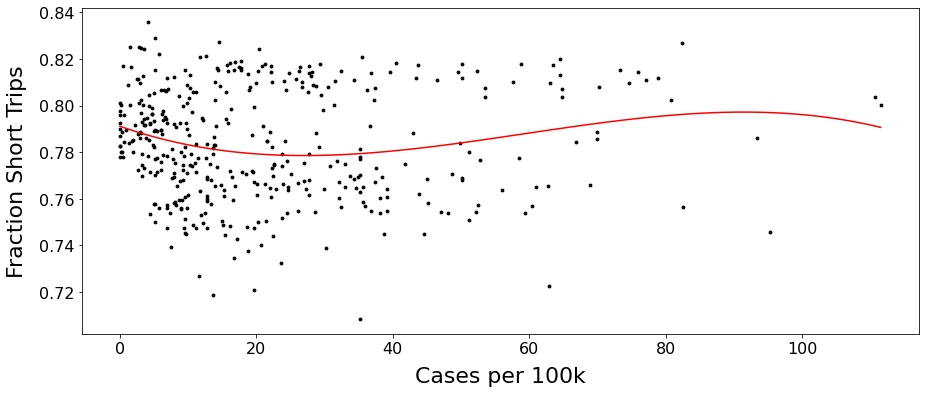

Cross-validated MSE: 0.00022338444609442328


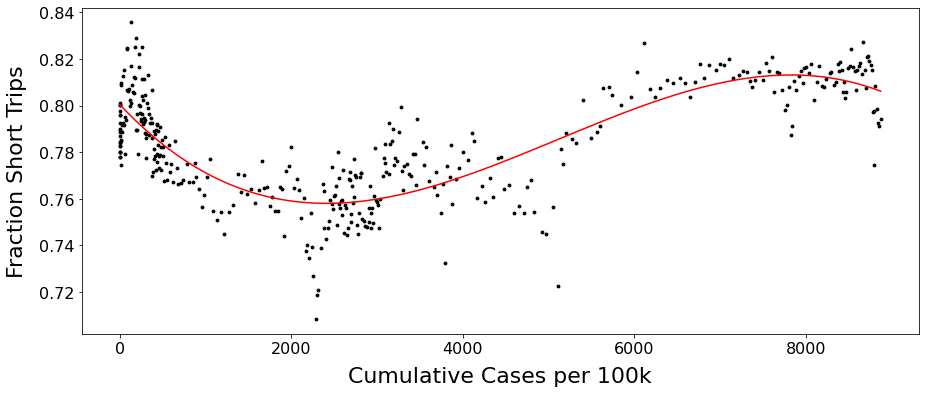

Cross-validated MSE: 0.007205097530139643


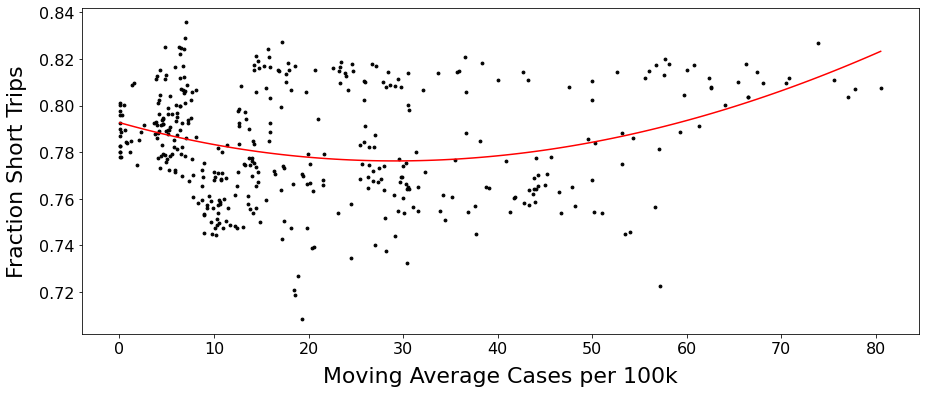

Cross-validated MSE: 0.001030221483459532


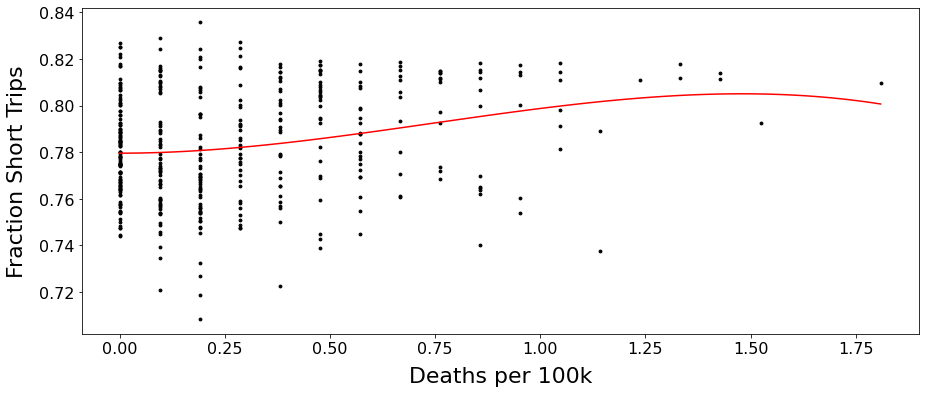

Cross-validated MSE: 0.01766693325447654


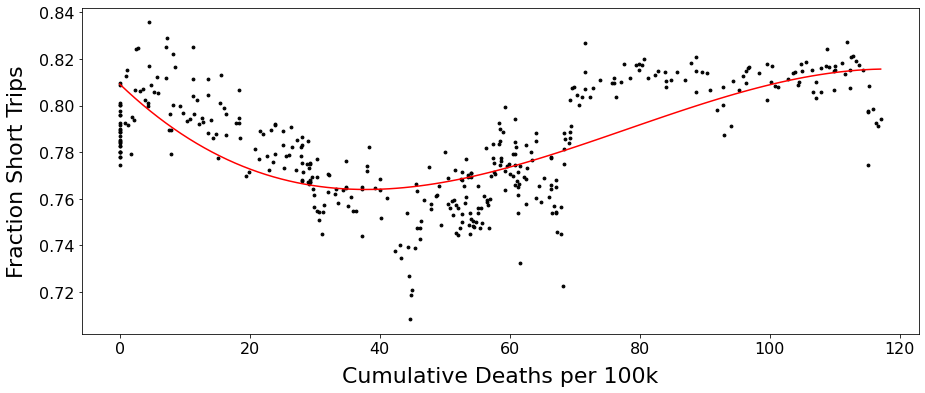

Cross-validated MSE: 0.0020270176491841052


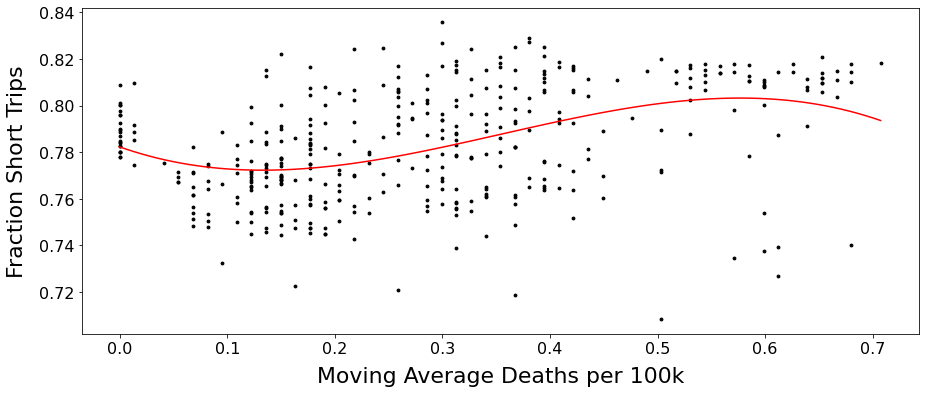

In [26]:
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Short")
fulton_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(fulton_X.columns)):
    spline_wrapper(fulton_X, fulton_y, fulton_X.columns[i], feature_labels[i], fulton_smoothing[i], "Fraction Short Trips")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.0005898199894470105


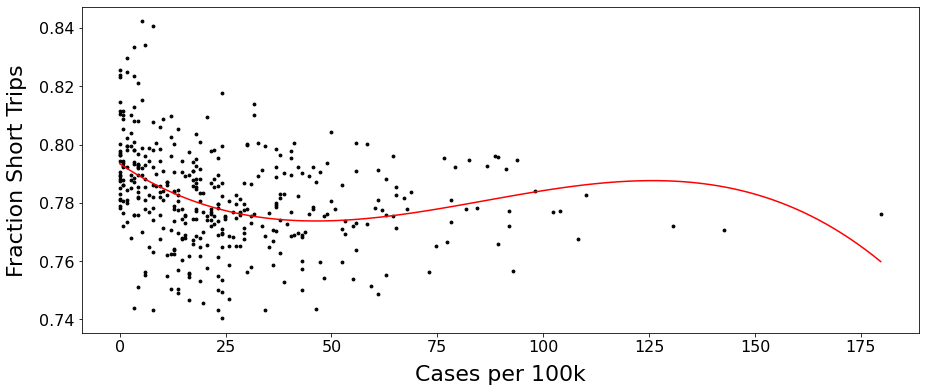

Cross-validated MSE: 0.0003548990708685398


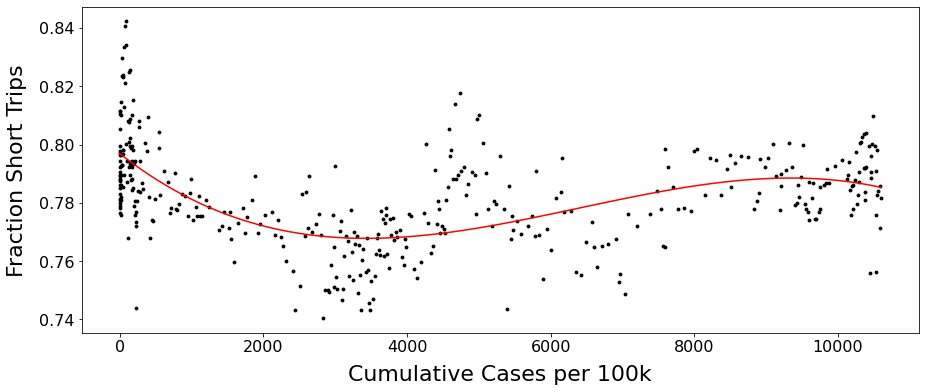

Cross-validated MSE: 0.0003133508342227003


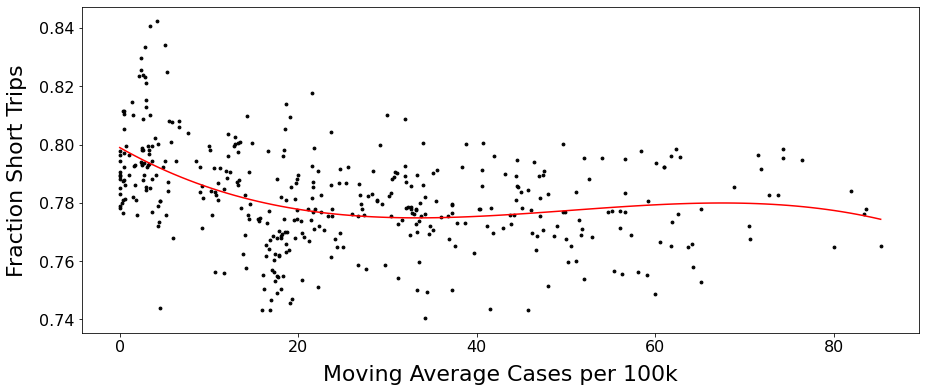

Cross-validated MSE: nan


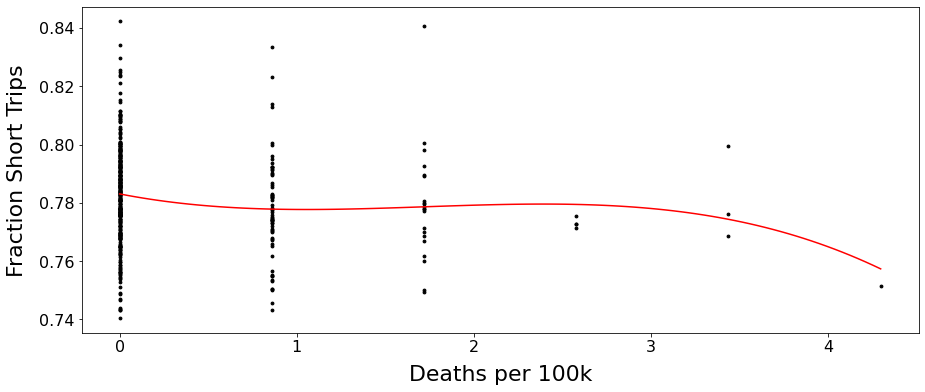

Cross-validated MSE: 0.00035058592393259335


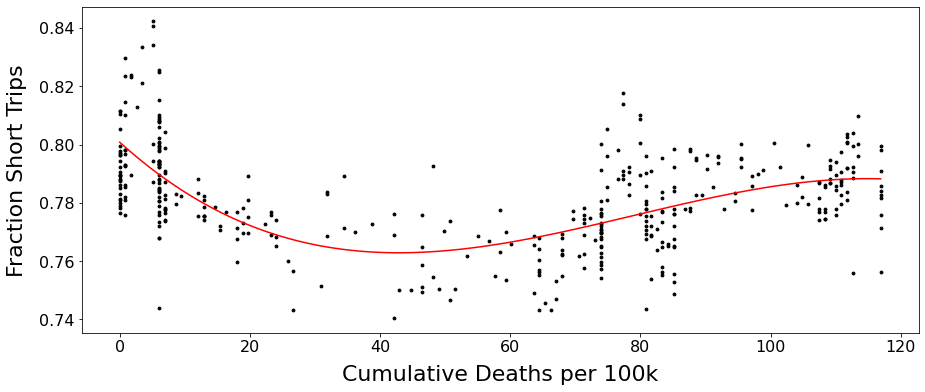

Cross-validated MSE: 0.013682253405419809


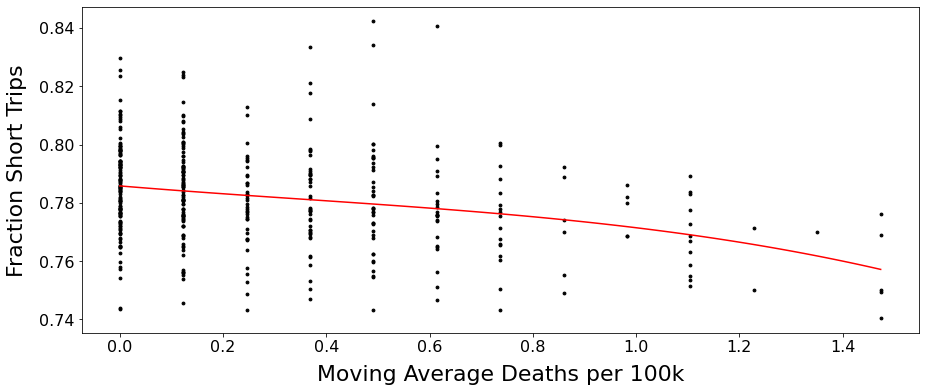

In [27]:
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Short")
lowndes_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(lowndes_X.columns)):
    spline_wrapper(lowndes_X, lowndes_y, lowndes_X.columns[i], feature_labels[i], lowndes_smoothing[i], "Fraction Short Trips")

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Cross-validated MSE: 0.0026490933168785437


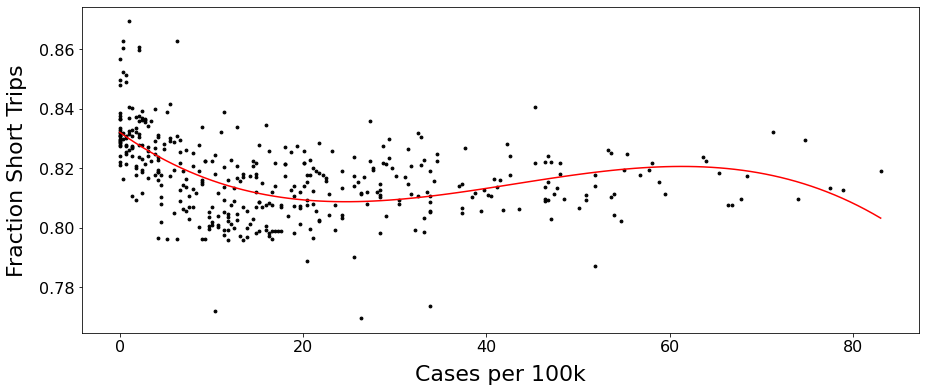

Cross-validated MSE: 0.0003358374187453041


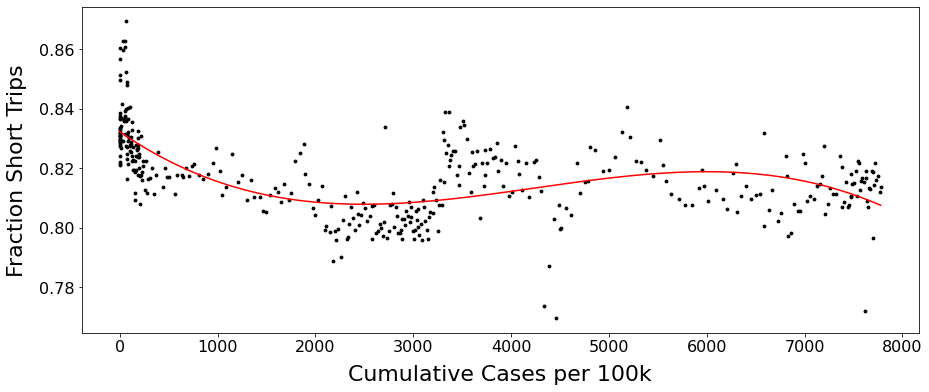

Cross-validated MSE: 0.001552263283800795


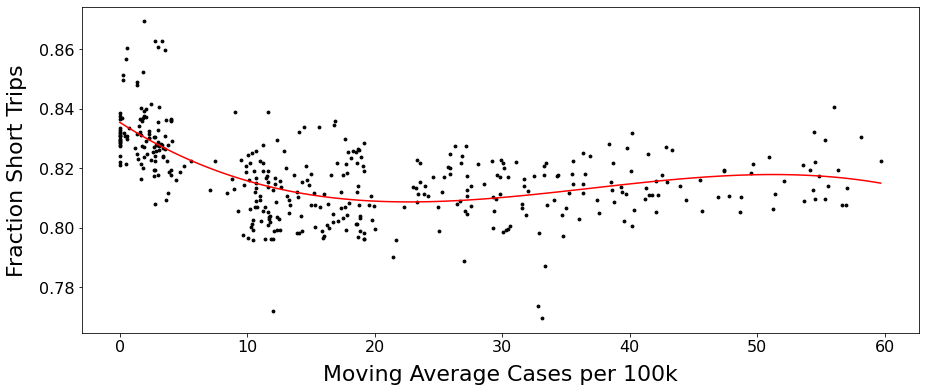

Cross-validated MSE: 2.100889345096059e+27


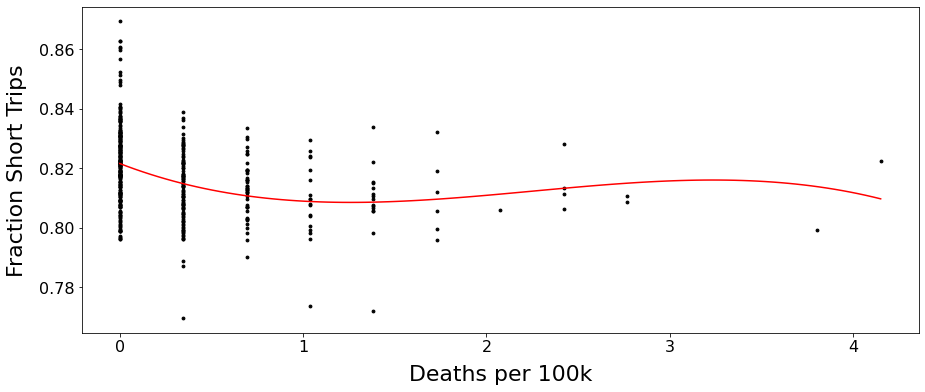

Cross-validated MSE: 0.00022149617948883675


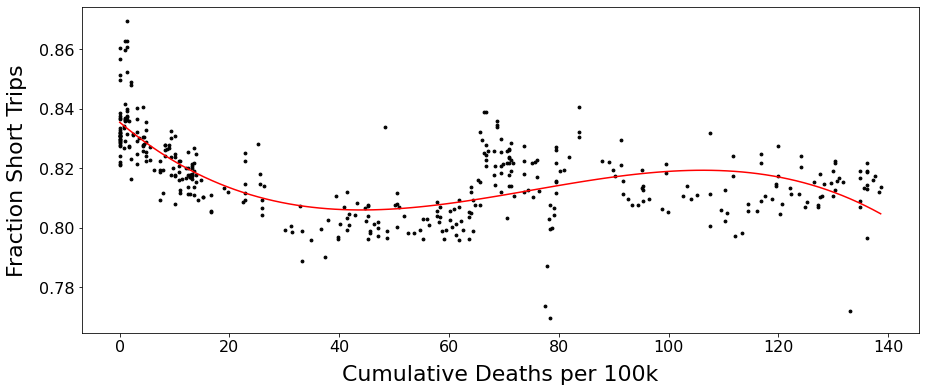

Cross-validated MSE: 0.0006160766056947395


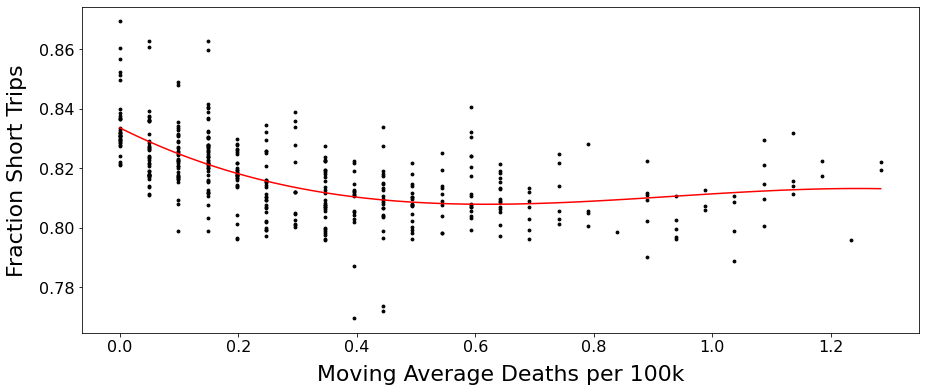

In [28]:
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Short")
chatham_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(chatham_X.columns)):
    spline_wrapper(chatham_X, chatham_y, chatham_X.columns[i], feature_labels[i], chatham_smoothing[i], "Fraction Short Trips")

# BIVARIATE

In [33]:
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Population")
kf = KFold(n_splits=5)
mse_vals = []
for train_indices, test_indices in kf.split(fulton_X):
    train_X, test_X = fulton_X.iloc[train_indices], fulton_X.iloc[test_indices]
    train_y, test_y = fulton_y[train_indices], fulton_y[test_indices]
    
    spline = interpolate.Rbf(train_X["total_cases_cum"]/max(train_X["total_cases_cum"]),
                         train_X["moving_avg_deaths"]/max(train_X["moving_avg_deaths"]),
                         train_y,smooth=.01,epsilon=.5)
    pred_y = spline(test_X["total_cases_cum"]/max(train_X["total_cases_cum"]),
                   test_X["moving_avg_deaths"]/max(train_X["moving_avg_deaths"]))
    mse = ((test_y - pred_y)**2).mean()
    mse_vals.append(mse)
print("Cross-validated MSE: {}".format(np.array(mse_vals).mean()))

Cross-validated MSE: 0.0007645257463840623


In [40]:
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Population")

spline = interpolate.Rbf(fulton_X["total_cases_cum"]/max(fulton_X["total_cases_cum"]),
                         fulton_X["moving_avg_deaths"]/max(fulton_X["moving_avg_deaths"]),
                         fulton_y,smooth=.01,epsilon=.5)

x1_range = np.arange(0,1.05,0.01)
x2_range = np.arange(0,1.05,0.01)
x1_range, x2_range = np.meshgrid(x1_range, x2_range, indexing='xy')

new_Z = spline(x1_range, x2_range)

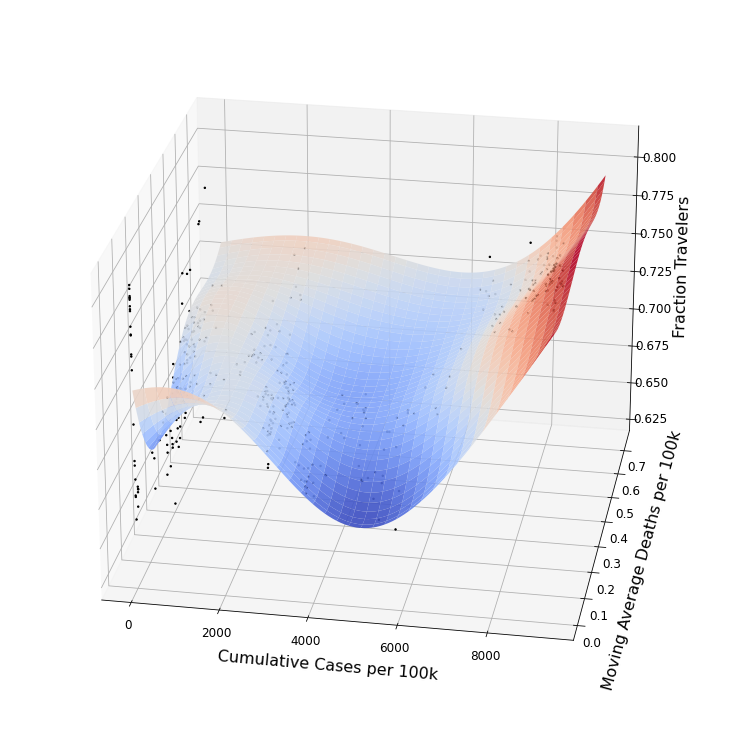

In [50]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

ax.scatter(fulton_X["total_cases_cum"],fulton_X["moving_avg_deaths"],fulton_y,s=2,color='k',alpha=1)
ax.plot_surface(x1_range * max(fulton_X["total_cases_cum"]), x2_range * max(fulton_X["moving_avg_deaths"]),
                new_Z, cmap=cm.coolwarm, linewidth=0, antialiased=True,alpha=.9)

ax.set_xlabel("Cumulative Cases per 100k",fontsize=16,labelpad=10)
ax.set_ylabel("Moving Average Deaths per 100k",fontsize=16,labelpad=12)
ax.set_zlabel("Fraction Travelers",fontsize=16,labelpad=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for t in ax.zaxis.get_major_ticks():
    t.label.set_fontsize(12)
ax.tick_params(axis='z', which='major', pad=8)

ax.elev = 25
ax.azim = 280
# for i in range(36):
#     ax.azim = 10*i
#     plt.savefig("movies/fulton_spline_angle{:02d}.png".format(i))
plt.savefig("fulton_bivar spline_fraction travelers.png")
plt.show()

# GENERAL MULTIVARIATE

In [125]:
def multi_spline_wrapper(input_X, input_y, target):
    kf = KFold(n_splits=5)
    mse_vals = []
    for train_indices, test_indices in kf.split(input_X):
        train_X, test_X = input_X.iloc[train_indices], input_X.iloc[test_indices]
        train_y, test_y = input_y[train_indices], input_y[test_indices]
        if target == "Population":
            spline = interpolate.Rbf(train_X["total_cases_cum"].astype('float')/max(train_X["total_cases_cum"].astype('float')),
                                 train_X["deaths"].astype('float')/max(train_X["deaths"].astype('float')),
                                 train_X["moving_avg_deaths"].astype('float')/max(train_X["moving_avg_deaths"].astype('float')),
                                 train_X["vaccine_allocations"].astype('float')/max(train_X["vaccine_allocations"].astype('float')),
                                 train_y,smooth=.01,epsilon=4)
            pred_y = spline(test_X["total_cases_cum"]/max(train_X["total_cases_cum"].astype('float')),
                             test_X["deaths"]/max(train_X["deaths"].astype('float')),
                             test_X["moving_avg_deaths"]/max(train_X["moving_avg_deaths"].astype('float')),
                             test_X["vaccine_allocations"]/max(train_X["vaccine_allocations"].astype('float')))
        elif target == "Long":
            spline = interpolate.Rbf(train_X["total_cases_cum"].astype('float')/max(train_X["total_cases_cum"].astype('float')),
                                 train_X["deaths"].astype('float')/max(train_X["deaths"].astype('float')),
                                 train_X["death_cum"].astype('float')/max(train_X["death_cum"].astype('float')),
                                 train_X["moving_avg_deaths"].astype('float')/max(train_X["moving_avg_deaths"].astype('float')),
                                 train_X["vaccine_allocations"].astype('float')/max(train_X["vaccine_allocations"].astype('float')),
                                 train_y,smooth=.0719,epsilon=.5)
            pred_y = spline(test_X["total_cases_cum"]/max(train_X["total_cases_cum"].astype('float')),
                             test_X["deaths"]/max(train_X["deaths"].astype('float')),
                             test_X["death_cum"]/max(train_X["death_cum"].astype('float')),
                             test_X["moving_avg_deaths"]/max(train_X["moving_avg_deaths"].astype('float')),
                             test_X["vaccine_allocations"]/max(train_X["vaccine_allocations"].astype('float')))
        elif target == "Medium":
            spline = interpolate.Rbf(train_X["total_cases"].astype('float')/max(train_X["total_cases"].astype('float')),
                                 train_X["moving_avg_total_cases"].astype('float')/max(train_X["moving_avg_total_cases"].astype('float')),
                                 train_X["deaths"].astype('float')/max(train_X["deaths"].astype('float')),
                                 train_X["death_cum"].astype('float')/max(train_X["death_cum"].astype('float')),
                                 train_X["vaccine_allocations"].astype('float')/max(train_X["vaccine_allocations"].astype('float')),
                                 train_y,smooth=0.316,epsilon=.5)
            pred_y = spline(test_X["total_cases"].astype('float')/max(train_X["total_cases"].astype('float')),
                             test_X["moving_avg_total_cases"]/max(train_X["moving_avg_total_cases"].astype('float')),
                             test_X["deaths"]/max(train_X["deaths"].astype('float')),
                             test_X["death_cum"]/max(train_X["death_cum"].astype('float')),
                             test_X["vaccine_allocations"]/max(train_X["vaccine_allocations"].astype('float')))
        elif target == "Short":
            spline = interpolate.Rbf(train_X["total_cases"].astype('float')/max(train_X["total_cases"].astype('float')),
                                train_X["moving_avg_total_cases"].astype('float')/max(train_X["moving_avg_total_cases"].astype('float')),
                                train_X["vaccine_allocations"].astype('float')/max(train_X["vaccine_allocations"].astype('float')),
                                train_y,smooth=0.00037,epsilon=.5)
            pred_y = spline(test_X["total_cases"].astype('float')/max(train_X["total_cases"].astype('float')),
                             test_X["moving_avg_total_cases"]/max(train_X["moving_avg_total_cases"].astype('float')),
                             test_X["vaccine_allocations"]/max(train_X["vaccine_allocations"].astype('float')))
        mse = ((test_y - pred_y)**2).mean()
        mse_vals.append(mse)
    print("Cross-validated MSE: {}".format(np.array(mse_vals).mean()))

# Population Not Staying Home

In [114]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Population")
state_trip_dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Population")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(state_X.shape[0]-len(cumul_doses),0))
state_X = pd.concat([state_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_spline_wrapper(state_X, state_y.reset_index(drop=True), target="Population")

Cross-validated MSE: 0.0020122821795129143


In [115]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Population")
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Population")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(fulton_X.shape[0]-len(cumul_doses),0))
fulton_X = pd.concat([fulton_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_spline_wrapper(fulton_X, fulton_y, target="Population")

Cross-validated MSE: 0.0025545289951717986


In [116]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Population")
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Population")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(lowndes_X.shape[0]-len(cumul_doses),0))
lowndes_X = pd.concat([lowndes_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_spline_wrapper(lowndes_X, lowndes_y, target="Population")

Cross-validated MSE: 0.0030495937757062837


In [117]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Population")
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Population")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(chatham_X.shape[0]-len(cumul_doses),0))
chatham_X = pd.concat([chatham_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_spline_wrapper(chatham_X, chatham_y, target="Population")

Cross-validated MSE: 0.0018237121608291843


# Long Trips

In [126]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Long")
state_trip_dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Long")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(state_X.shape[0]-len(cumul_doses),0))
state_X = pd.concat([state_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_spline_wrapper(state_X, state_y.reset_index(drop=True),target="Long")

Cross-validated MSE: 2.1220950020998823e-05


In [127]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Long")
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Long")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(fulton_X.shape[0]-len(cumul_doses),0))
fulton_X = pd.concat([fulton_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_spline_wrapper(fulton_X, fulton_y,target="Long")

Cross-validated MSE: 4.4832408090338e-05


In [128]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Long")
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Long")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(lowndes_X.shape[0]-len(cumul_doses),0))
lowndes_X = pd.concat([lowndes_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_spline_wrapper(lowndes_X, lowndes_y,target="Long")

Cross-validated MSE: 5.898185854086146e-05


In [129]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Long")
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Long")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(chatham_X.shape[0]-len(cumul_doses),0))
chatham_X = pd.concat([chatham_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_spline_wrapper(chatham_X, chatham_y,target="Long")

Cross-validated MSE: 2.458659562215138e-05


# Medium Trips

In [130]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Medium")
state_trip_dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Medium")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(state_X.shape[0]-len(cumul_doses),0))
state_X = pd.concat([state_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_spline_wrapper(state_X, state_y.reset_index(drop=True), target="Medium")

Cross-validated MSE: 0.0051931761082924625


In [131]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Medium")
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Medium")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(fulton_X.shape[0]-len(cumul_doses),0))
fulton_X = pd.concat([fulton_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_spline_wrapper(fulton_X, fulton_y, target="Medium")

Cross-validated MSE: 0.003256334677284345


In [132]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Medium")
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Medium")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(lowndes_X.shape[0]-len(cumul_doses),0))
lowndes_X = pd.concat([lowndes_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_spline_wrapper(lowndes_X, lowndes_y, target="Medium")

Cross-validated MSE: 0.0031462841421179685


In [133]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Medium")
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Medium")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(chatham_X.shape[0]-len(cumul_doses),0))
chatham_X = pd.concat([chatham_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_spline_wrapper(chatham_X, chatham_y, target="Medium")

Cross-validated MSE: 0.00204616157777572


# Short Trips

In [134]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Short")
state_trip_dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Short")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(state_X.shape[0]-len(cumul_doses),0))
state_X = pd.concat([state_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_spline_wrapper(state_X, state_y.reset_index(drop=True), target="Short")

Cross-validated MSE: 0.0025049168128101072


In [135]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Short")
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Short")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(fulton_X.shape[0]-len(cumul_doses),0))
fulton_X = pd.concat([fulton_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_spline_wrapper(fulton_X, fulton_y, target="Short")

Cross-validated MSE: 0.01835666110839855


In [136]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Short")
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Short")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(lowndes_X.shape[0]-len(cumul_doses),0))
lowndes_X = pd.concat([lowndes_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_spline_wrapper(lowndes_X, lowndes_y, target="Short")

Cross-validated MSE: 0.0025296479230594126


In [137]:
alloc_dates, state_y, cumul_doses = covid_feature_extraction.cumul_doses("Georgia","GA","Short")
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Short")

padded_cumul_doses = np.pad(cumul_doses,pad_width=(chatham_X.shape[0]-len(cumul_doses),0))
chatham_X = pd.concat([chatham_X,pd.Series(padded_cumul_doses,name="vaccine_allocations")],axis=1)

feature_labels += ["Cumulative Vaccine Allocations"]

multi_spline_wrapper(chatham_X, chatham_y, target="Short")

Cross-validated MSE: 0.04482814416866866
